---
<img align="right" width="130" src="https://upload.wikimedia.org/wikipedia/commons/9/9a/Logo_inpt.PNG">

# **Reconnaissance de chiffres en langue des signes <br/> avec les Réseaux de  Neurones Convolutionnels  (CNN)** 

---
> 🇬🇧 _Sign Language Digit Recognizer with Convolutional Neural Networks (CNN)_  

<img align="right" src="https://deeplizard.com/images/sign%20language%20data.png">

### Groupe :           ***JVLIVS***                                                                                                     
>- ELAOUMARI Chaimae
>- LAGHMAM Yassine              
>- MANOUZI -OUTMANI Mouad

### Encadré par : 
>- Mr.Abdelhak Mahmoudi    

---
#### ✔️ **Le but de cette étude est de parvenir à un bon modèle de classification avec une précision de validation d'au moins 95%.**
---

###  ✅ **Importation des bibliothèques nécessaires.** <br><br> ✅ **Configuration de l'environnement de travail.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

from matplotlib.axes._axes import _log as matplotlib_axes_logger 
    
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='serif', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

Using TensorFlow backend.


 ### ✅ **Importation des bases de données**

> _[Lien Kaggle vers la source utilisée](https://www.kaggle.com/ardamavi/sign-language-digits-dataset)_
*   Image size: 64x64
*   Color space: Grayscale
*   File format: npy ( NumPy array file )
*   Number of classes: 10 (Digits: 0-9)

In [0]:
X = np.load('/content/drive/My Drive/Colab Notebooks/X.npy')
y = np.load('/content/drive/My Drive/Colab Notebooks/Y.npy')
print("Base de données importée!")

Base de données importée!


In [0]:
def decode_OneHotEncoding(label):
    label_new=list()
    for target in label:
        label_new.append(np.argmax(target))
    label=np.array(label_new)
    return label

def Afficher_classe_image(image, label, n=10):
    label=decode_OneHotEncoding(label)
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):

            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index], cmap='gray')
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Le chiffre :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} échantillons pour chaque classe ( chiffre )".format(n),weight='700',color='Green', size=15)
    plt.show()

 ### ✅ **Exploration de la source**

In [0]:
print("La taille du vecteur des features: " + str(np.shape(X)))
print("La taille du vecteur des classes: " + str(np.shape(y)))

La taille du vecteur des features: (2062, 64, 64)
La taille du vecteur des classes: (2062, 10)


In [0]:
#On applique le One Hot Encoding pour les variables catégoriques
y_decoded=decode_OneHotEncoding(y.copy())

#Calculer le nombre d'échantillons de chaque chiffre
échantillons_par_classe=np.unique(y_decoded, return_counts=True)  

Nombre_de_classes=y.shape[1]

print(20*"-", "Détails de la base de données",15*"-")
print("La taille de chaque image : {}x{}".format(X.shape[1], X.shape[2]))
print("Nombre de classes ( Les chiffres 0-9 ) : ",Nombre_de_classes)
print("Nombre total des échantillons : {}".format(X.shape[0]))
for chiffre, Nombre_des_échantillons in zip(échantillons_par_classe[0], échantillons_par_classe[1]):
    print(" Le chiffre {}  a {} échantillons.".format(chiffre, Nombre_des_échantillons))
print(65*"-")

-------------------- Détails de la base de données ---------------
La taille de chaque image : 64x64
Nombre de classes ( Les chiffres 0-9 ) :  10
Nombre total des échantillons : 2062
 Le chiffre 0  a 205 échantillons.
 Le chiffre 1  a 206 échantillons.
 Le chiffre 2  a 206 échantillons.
 Le chiffre 3  a 206 échantillons.
 Le chiffre 4  a 207 échantillons.
 Le chiffre 5  a 207 échantillons.
 Le chiffre 6  a 207 échantillons.
 Le chiffre 7  a 206 échantillons.
 Le chiffre 8  a 208 échantillons.
 Le chiffre 9  a 204 échantillons.
-----------------------------------------------------------------


---
> ##### **▶️ Affichage de 10 échantillons de chaque chiffre dans la base.**
---

> 






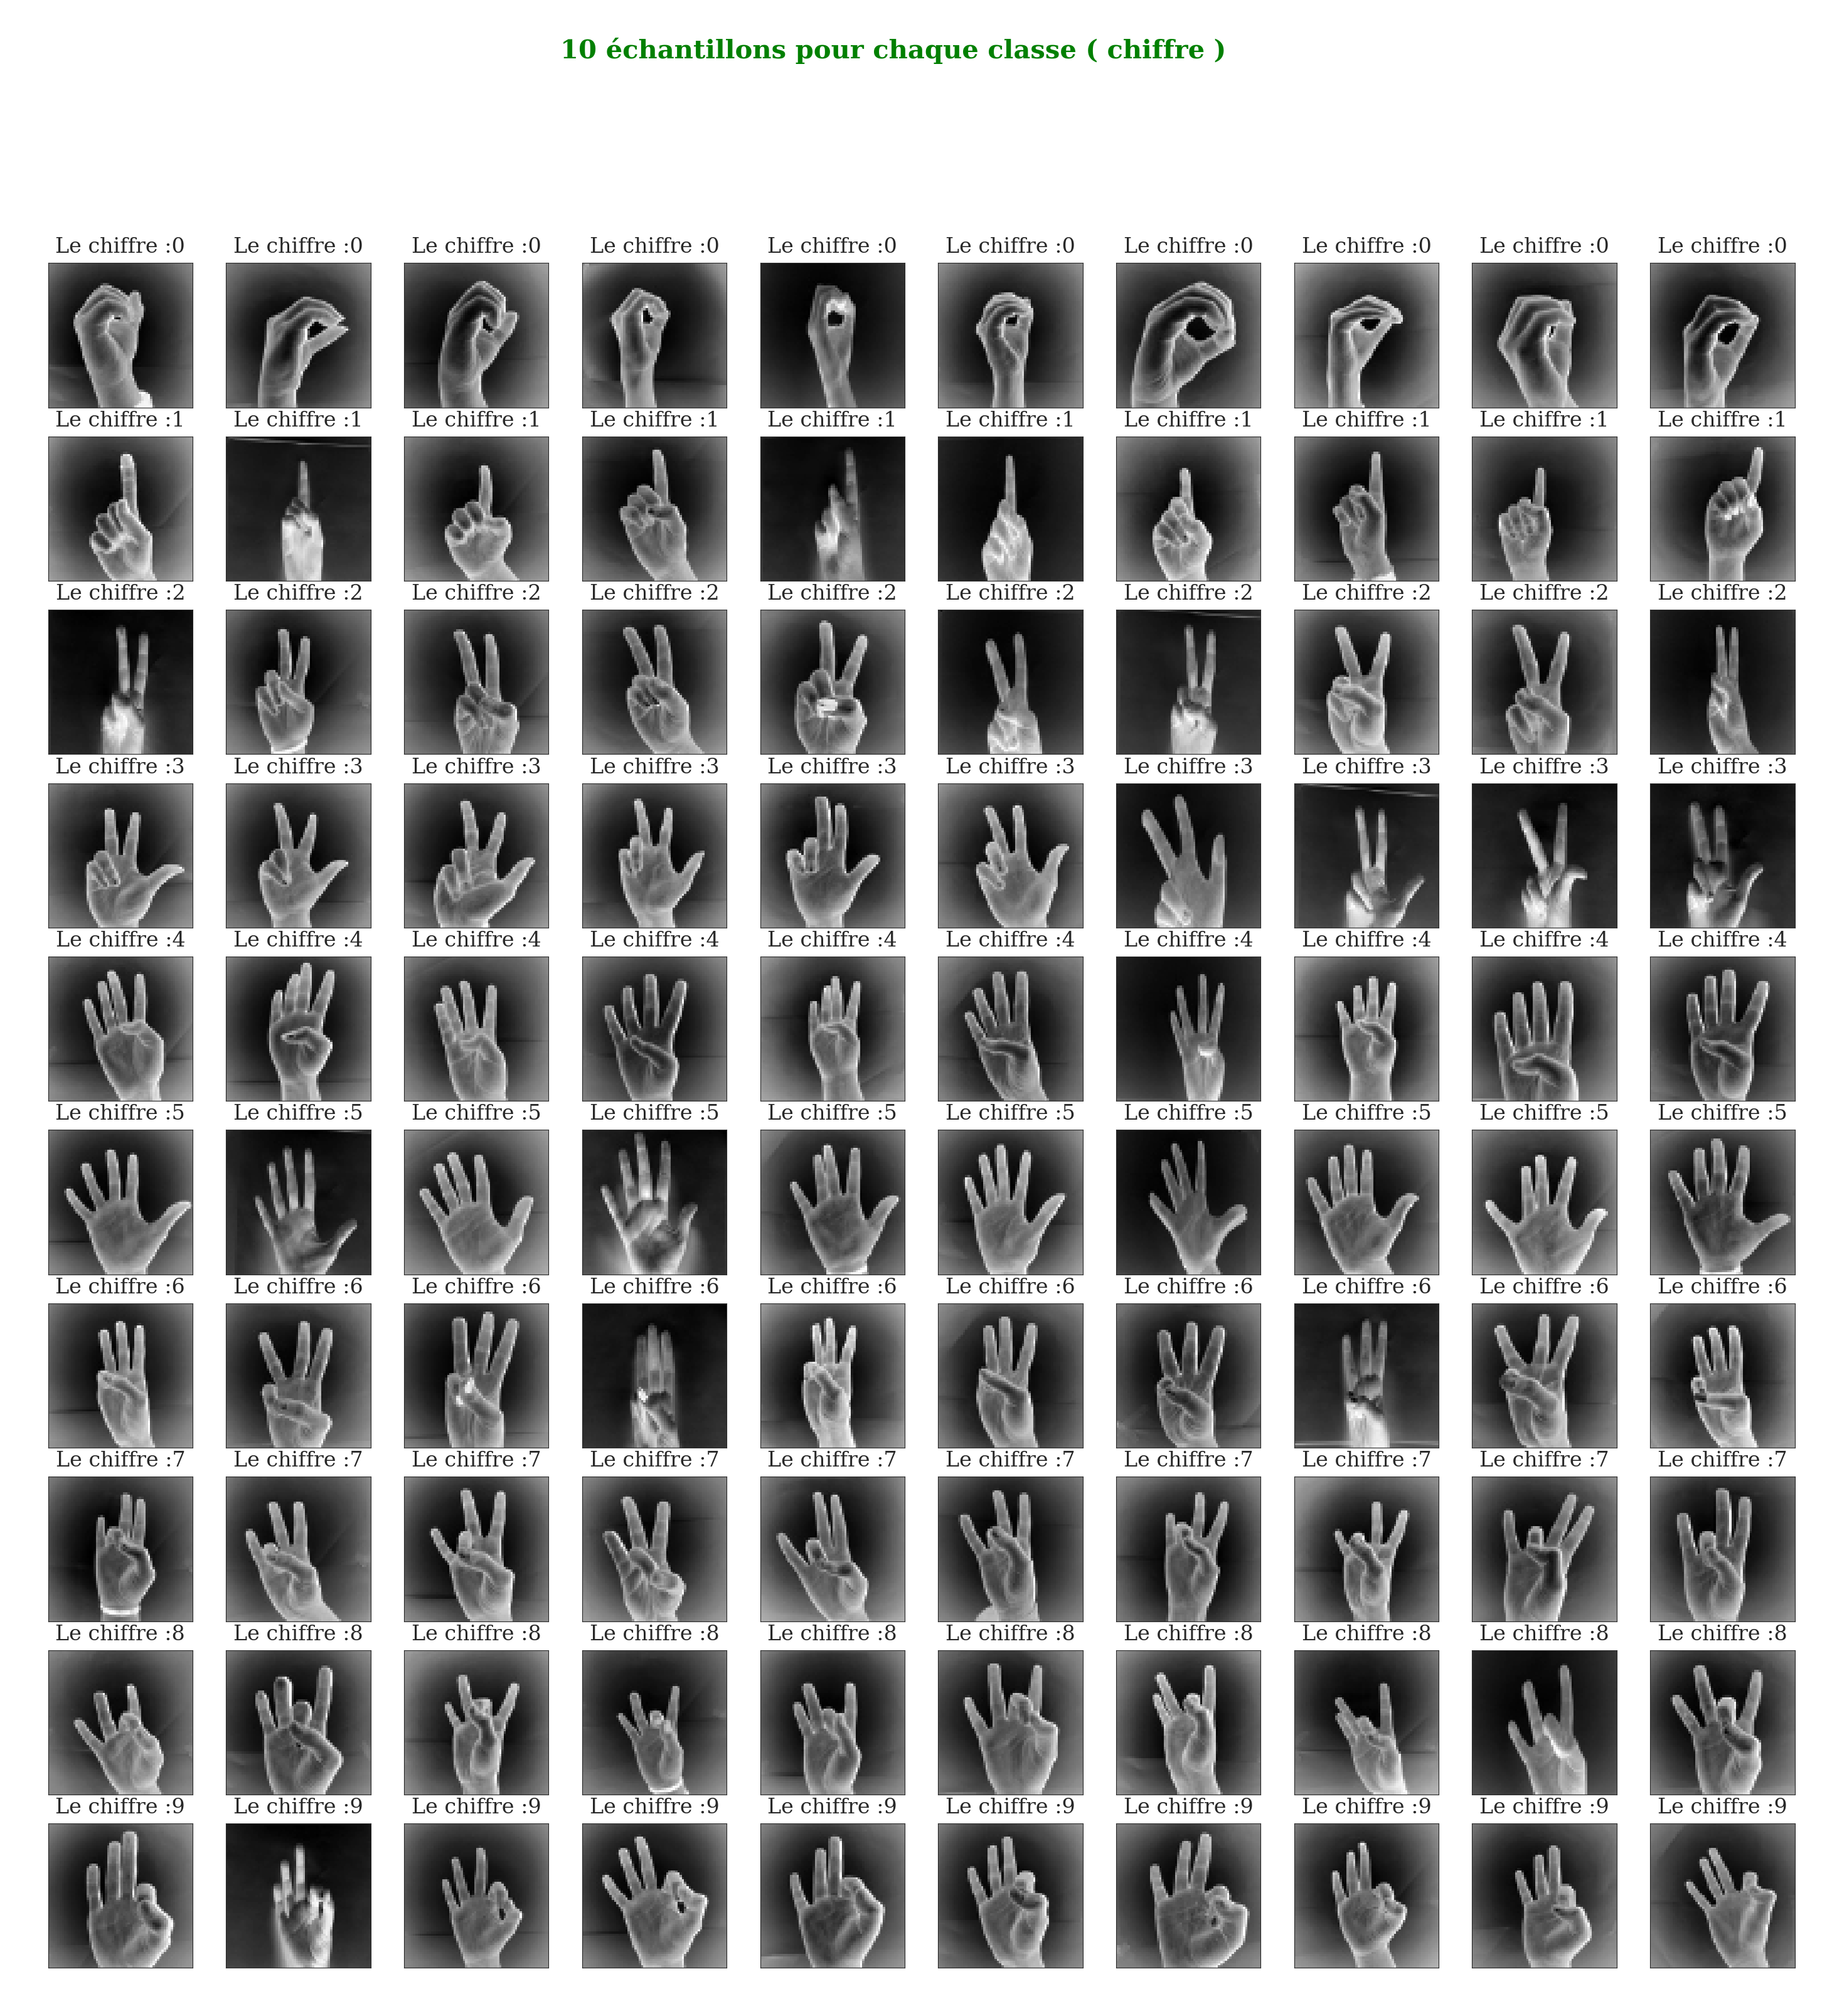

In [0]:
Afficher_classe_image(image=X, label=y.copy())

In [0]:
L=[0,250,450,650,850,1050,1250,1450,1650,1858]
chiffre=0
for i in L:
    print("Le chiffre {}  est représenté par {}".format(chiffre,y[i]))
    chiffre=chiffre+1

Le chiffre 0  est représenté par [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Le chiffre 1  est représenté par [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Le chiffre 2  est représenté par [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Le chiffre 3  est représenté par [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Le chiffre 4  est représenté par [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Le chiffre 5  est représenté par [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Le chiffre 6  est représenté par [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Le chiffre 7  est représenté par [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Le chiffre 8  est représenté par [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Le chiffre 9  est représenté par [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


 ### ✅ **La Régression Logistique**

---
> ##### **1️⃣ Préparation des données afin de les rendre utilisables dans le modèle de la régression logistique : Converstion en dimension 2 au lieu de 3.**
---






In [0]:
X_reg = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

#En se basant sur le nombre d'échantillons de chaque chiffre dans la source
zero    = np.zeros(205)
un      = np.ones(206)
deux    = [2 for i in range(206)]
trois   = [3 for i in range(206)]
quatre  = [4 for i in range(207)]
cinq    = [5 for i in range(207)]
six     = [6 for i in range(207)]
sept    = [7 for i in range(206)]
huit    = [8 for i in range(208)]
neuf    = [9 for i in range(204)]
y_reg = np.concatenate((zero,un,deux,trois,quatre,cinq,six,sept,huit,neuf), axis=0).reshape(X.shape[0],1)

print("X_reg shape:",X_reg.shape)
print("y_reg shape:",y_reg.shape)

X_reg shape: (2062, 4096)
y_reg shape: (2062, 1)


---
> ##### **2️⃣ La division de l'ensemble de données en Ensemble d'apprentissage et Ensemble d'évaluation.**
---

In [0]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [0]:
print("Training shape:", X_reg_train.shape)
print("y_train shape: ",y_reg_train.shape)
print("Test shape:", X_reg_test.shape)
print("y_test shape: ",y_reg_test.shape)

Training shape: (1649, 4096)
y_train shape:  (1649, 1)
Test shape: (413, 4096)
y_test shape:  (413, 1)


---
> ##### **3️⃣ Création du modèle.**
---

In [0]:
from sklearn import linear_model
reglog = linear_model.LogisticRegression(random_state=42,multi_class ="multinomial",solver="lbfgs")
reglog.fit(X_reg_train, y_reg_train)
y_reg_head = reglog.predict(X_reg_test)
Precision_reg = reglog.score(X_reg_test,y_reg_test)
print("Précison de la Régression Logistique : ",Precision_reg)

Précison de la Régression Logistique :  0.7530266343825666


---
> ##### **4️⃣ Evalution du modèle en utilisant la matrice de confusion.**
---





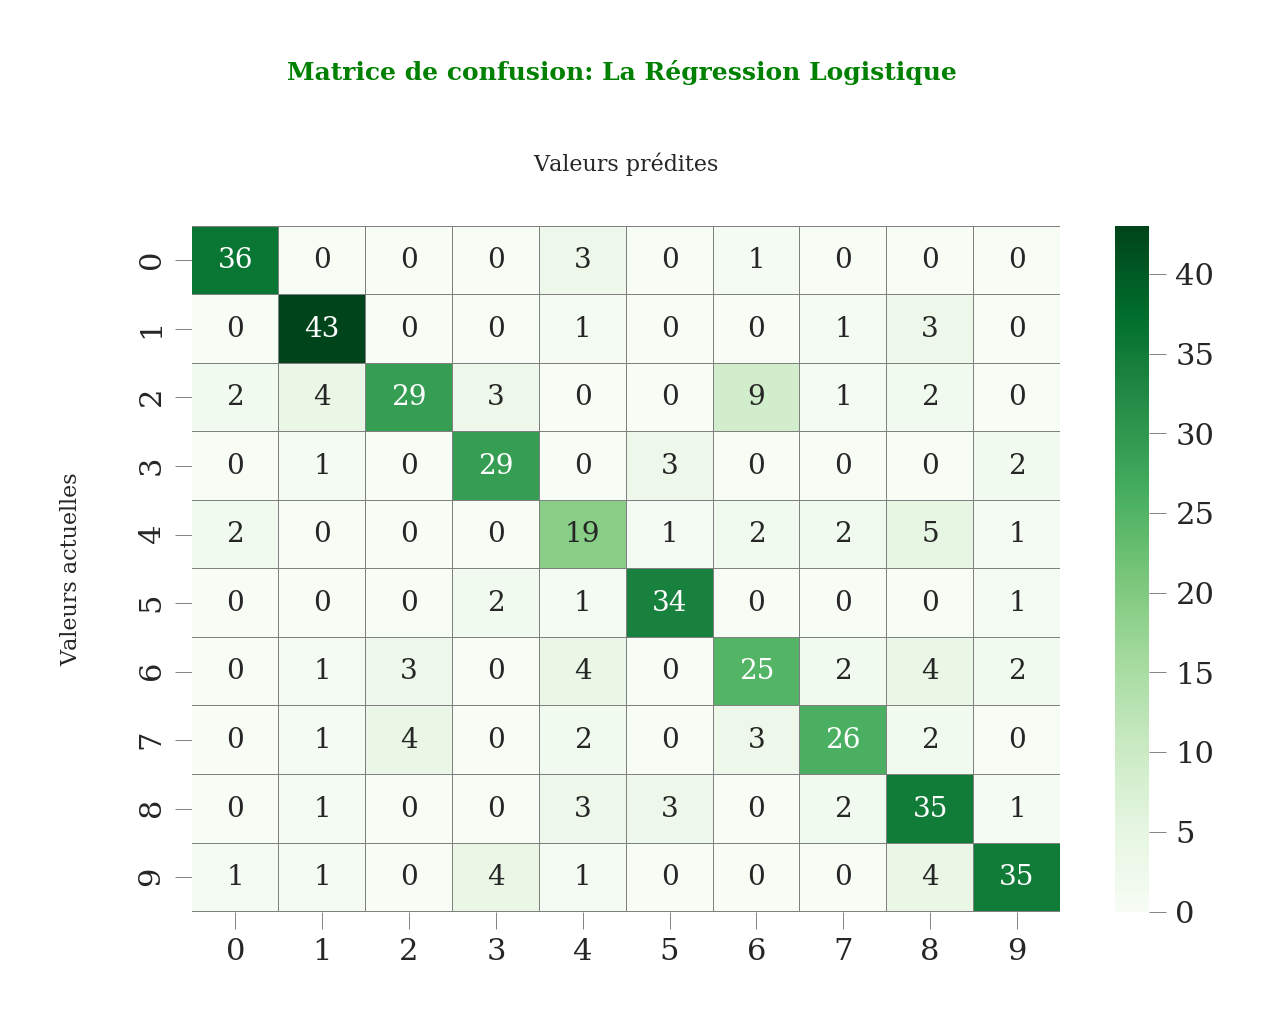

In [0]:
from sklearn import metrics 

cnf_matrix = metrics.confusion_matrix(y_reg_test,y_reg_head.reshape(-1,1)) 
class_names=[0,1,2,3,4,5,6,7,8,9]

f,ax = plt.subplots(figsize=(6, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion: La Régression Logistique \n\n', weight='700',color='Green', size=9)
plt.ylabel('Valeurs actuelles', size=8)
plt.xlabel('Valeurs prédites',size=8)
plt.show()

>> ***En diagonale, les prédictions correctes. On remarque qu'il y a pas mal de résultats défectueux comme par exemple le chiffre 2 qu'on peut confondre 9 fois avec le chiffre 6.***

 ### ✅ **Les Réseaux de Neurones Convolutionnels (CNN)** 

---
> ##### **1️⃣ Remodéler les données afin de les rendre utilisables avec la bibliothèque Keras.**
---

>>Pour X : Passage de (2062, 64, 64) à (2062, 64, 64, 1) où:
*   2062 est le nombre d'images
*   64, 64 sont la taille des pixels pour la hauteur et la largeur
*   1 est la valeur de canal qui représente l'échelle de gris ( Grayscale )

>>Pour y : Déjà à (2062, 10), où:
*   2062 est le nombre d'images
*   10 est le nombre de classes 










---
> ##### **2️⃣ Définition de la fonction qui va afficher à chaque fois les graphs comparatifs des précisions du modèle ainsi que du taux de perte sur l’ensemble d'entraînement et l’ensemble d'évaluation.**
---

In [0]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validation Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validation Accuracy"]=modelHistory.history['val_accuracy']
    
    fig, axarr=plt.subplots(nrows=2, ncols=1 ,figsize=(12,8))
    axarr[0].set_title("History of Loss in Train and Validation Datasets",
                      weight='400',color='Blue', size=10)
    history[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
    axarr[1].set_title("History of Accuracy in Train and Validation Datasets",
                       weight='400',color='Blue', size=10)
    history[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1]) 
    plt.suptitle(" Convolutional Model {} Loss and Accuracy in Train and Validation Datasets".format(model_name),
                 weight='700',color='Green', size=15)
    plt.show()

---
> ##### **3️⃣ Définition de a fonction qui va nous assurer la division de l'ensemble de données en Ensemble d'apprentissage et Ensemble d'évaluation.**
---

In [0]:
def split_dataset(X, y, test_size=0.3, random_state=42):
    X_conv=X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
    return train_test_split(X_conv,y, stratify=y,test_size=test_size,random_state=random_state)

---
> ##### **4️⃣ Définition de la fonction qui va nous assurer à chaque appel la compilation et l'exécution du modèle.**<br>***🔸 NB: Nombre d’Epochs = 100 . Optimizer = RMSprop***
---

In [0]:
def evaluate_conv_model(model, model_name, X, y, epochs=100,
                        optimizer=optimizers.RMSprop(lr=0.0001), callbacks=None):
    print("[INFO]:Convolutional Model {} created...".format(model_name))
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    ## Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    
    print("[INFO]:Convolutional Model {} compiled...".format(model_name))
    
    print("[INFO]:Convolutional Model {} training....".format(model_name))
    earlyStopping = EarlyStopping(monitor = 'val_loss', patience=20, verbose = 1) 
    if callbacks is None:
        callbacks = [earlyStopping]
    
    ## Fit the Model
    modelHistory=model.fit(X_train, y_train, 
             validation_data=(X_test, y_test),
             callbacks=callbacks,
             epochs=epochs,
             verbose=0)
    print("[INFO]:Convolutional Model {} trained....".format(model_name))

    test_scores=model.evaluate(X_test, y_test, verbose=0)
    train_scores=model.evaluate(X_train, y_train, verbose=0)
    print("[INFO]:Train Accuracy:{:.3f}".format(train_scores[1]))
    print("[INFO]:Validation Accuracy:{:.3f}".format(test_scores[1]))
    
    show_model_history(modelHistory=modelHistory, model_name=model_name)
    return model

---
> ### **🟧 Construction du réseau CNN.**
---

---
>> #### La structure CNN du Modèle ️️1️⃣ : <br> ● Conv ==> MaxPooling ==> Dense (relu) ==> Dense (softmax).
--- 

[INFO]:Convolutional Model 1 created...
[INFO]:Convolutional Model 1 compiled...
[INFO]:Convolutional Model 1 training....
Epoch 00048: early stopping
[INFO]:Convolutional Model 1 trained....
[INFO]:Train Accuracy:0.799
[INFO]:Validation Accuracy:0.654


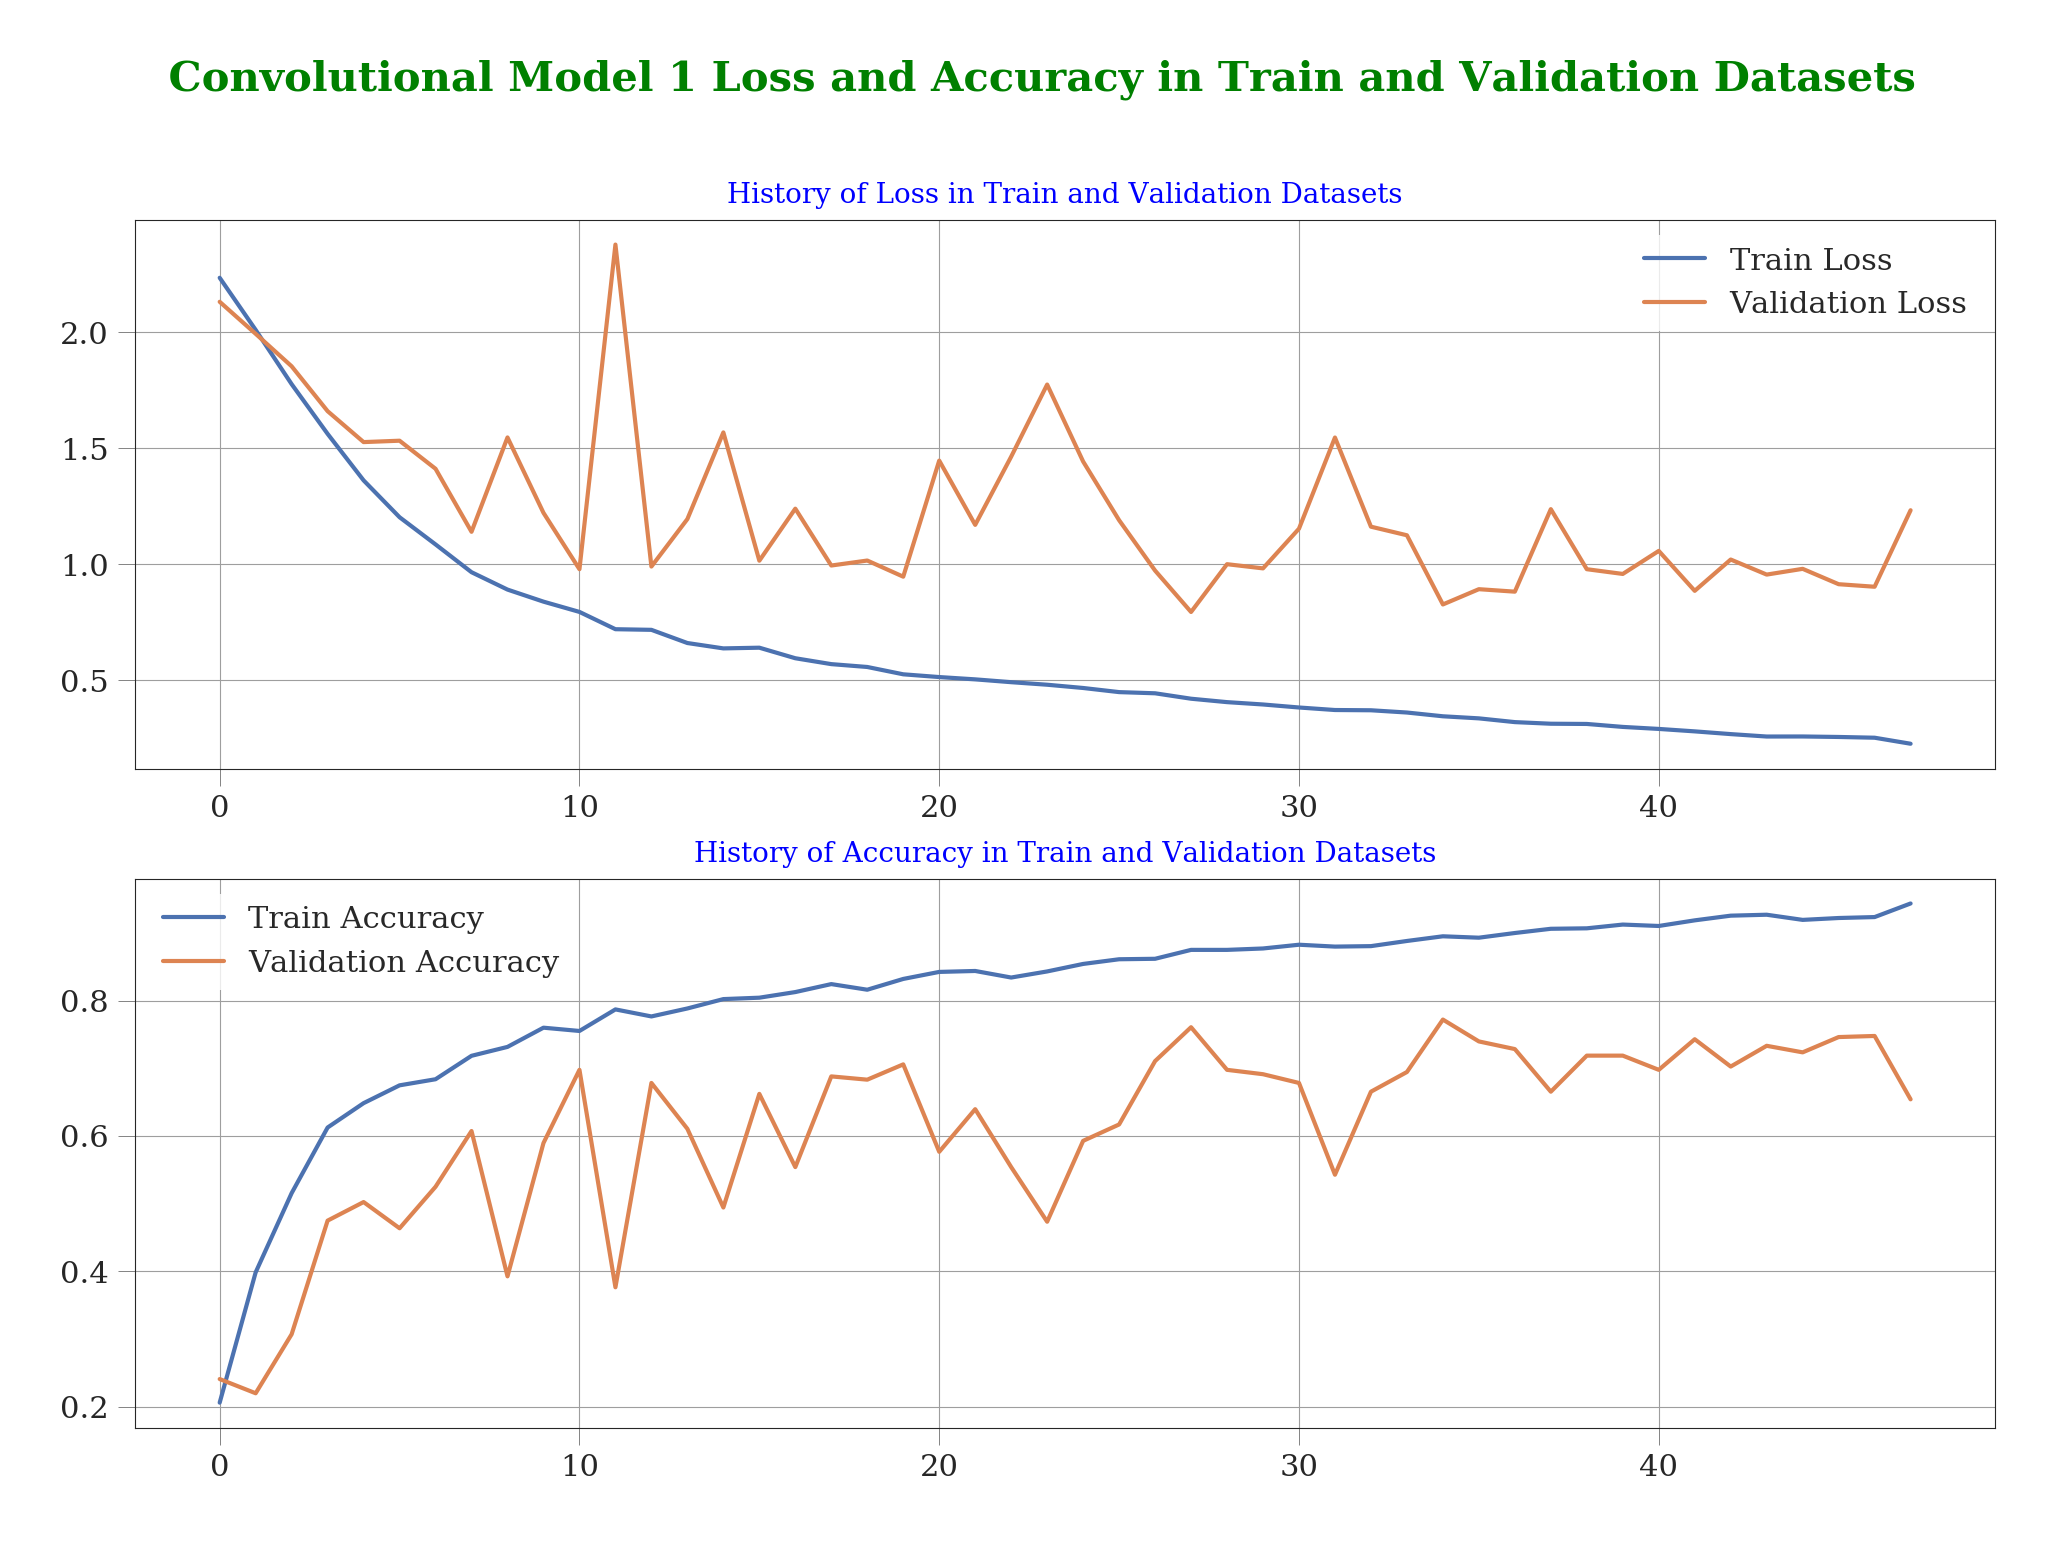

In [0]:
def build_conv_model_1():
    model=Sequential()
    
    model.add(layers.Conv2D(64, kernel_size=(3,3),
                           padding="same",
                           activation="relu", 
                           input_shape=(64, 64,1)))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
        
    return model

model=build_conv_model_1()
trained_model_1=evaluate_conv_model(model=model, model_name=1, X=X, y=y)

---
##### ⬆️ **Lorsque les graphiques ci-dessus sont examinés, on peut voir que le modèle a une précision d'apprentissage faible et une précision de validation plus faible. De plus, les zigzags du graphique de validation montrent que la robustesse des résultats de validation est très faible.**
##### ⬇️ ***Compte tenu des évaluations ci-dessus, il serait utile d'ajouter une nouvelle couche de convolution au modèle.***




---
>> #### La structure CNN du Modèle ️️2️⃣ : <br> ● Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Dense (relu) ==> Dense (softmax).
--- 

[INFO]:Convolutional Model 2 created...
[INFO]:Convolutional Model 2 compiled...
[INFO]:Convolutional Model 2 training....
Epoch 00052: early stopping
[INFO]:Convolutional Model 2 trained....
[INFO]:Train Accuracy:0.996
[INFO]:Validation Accuracy:0.851


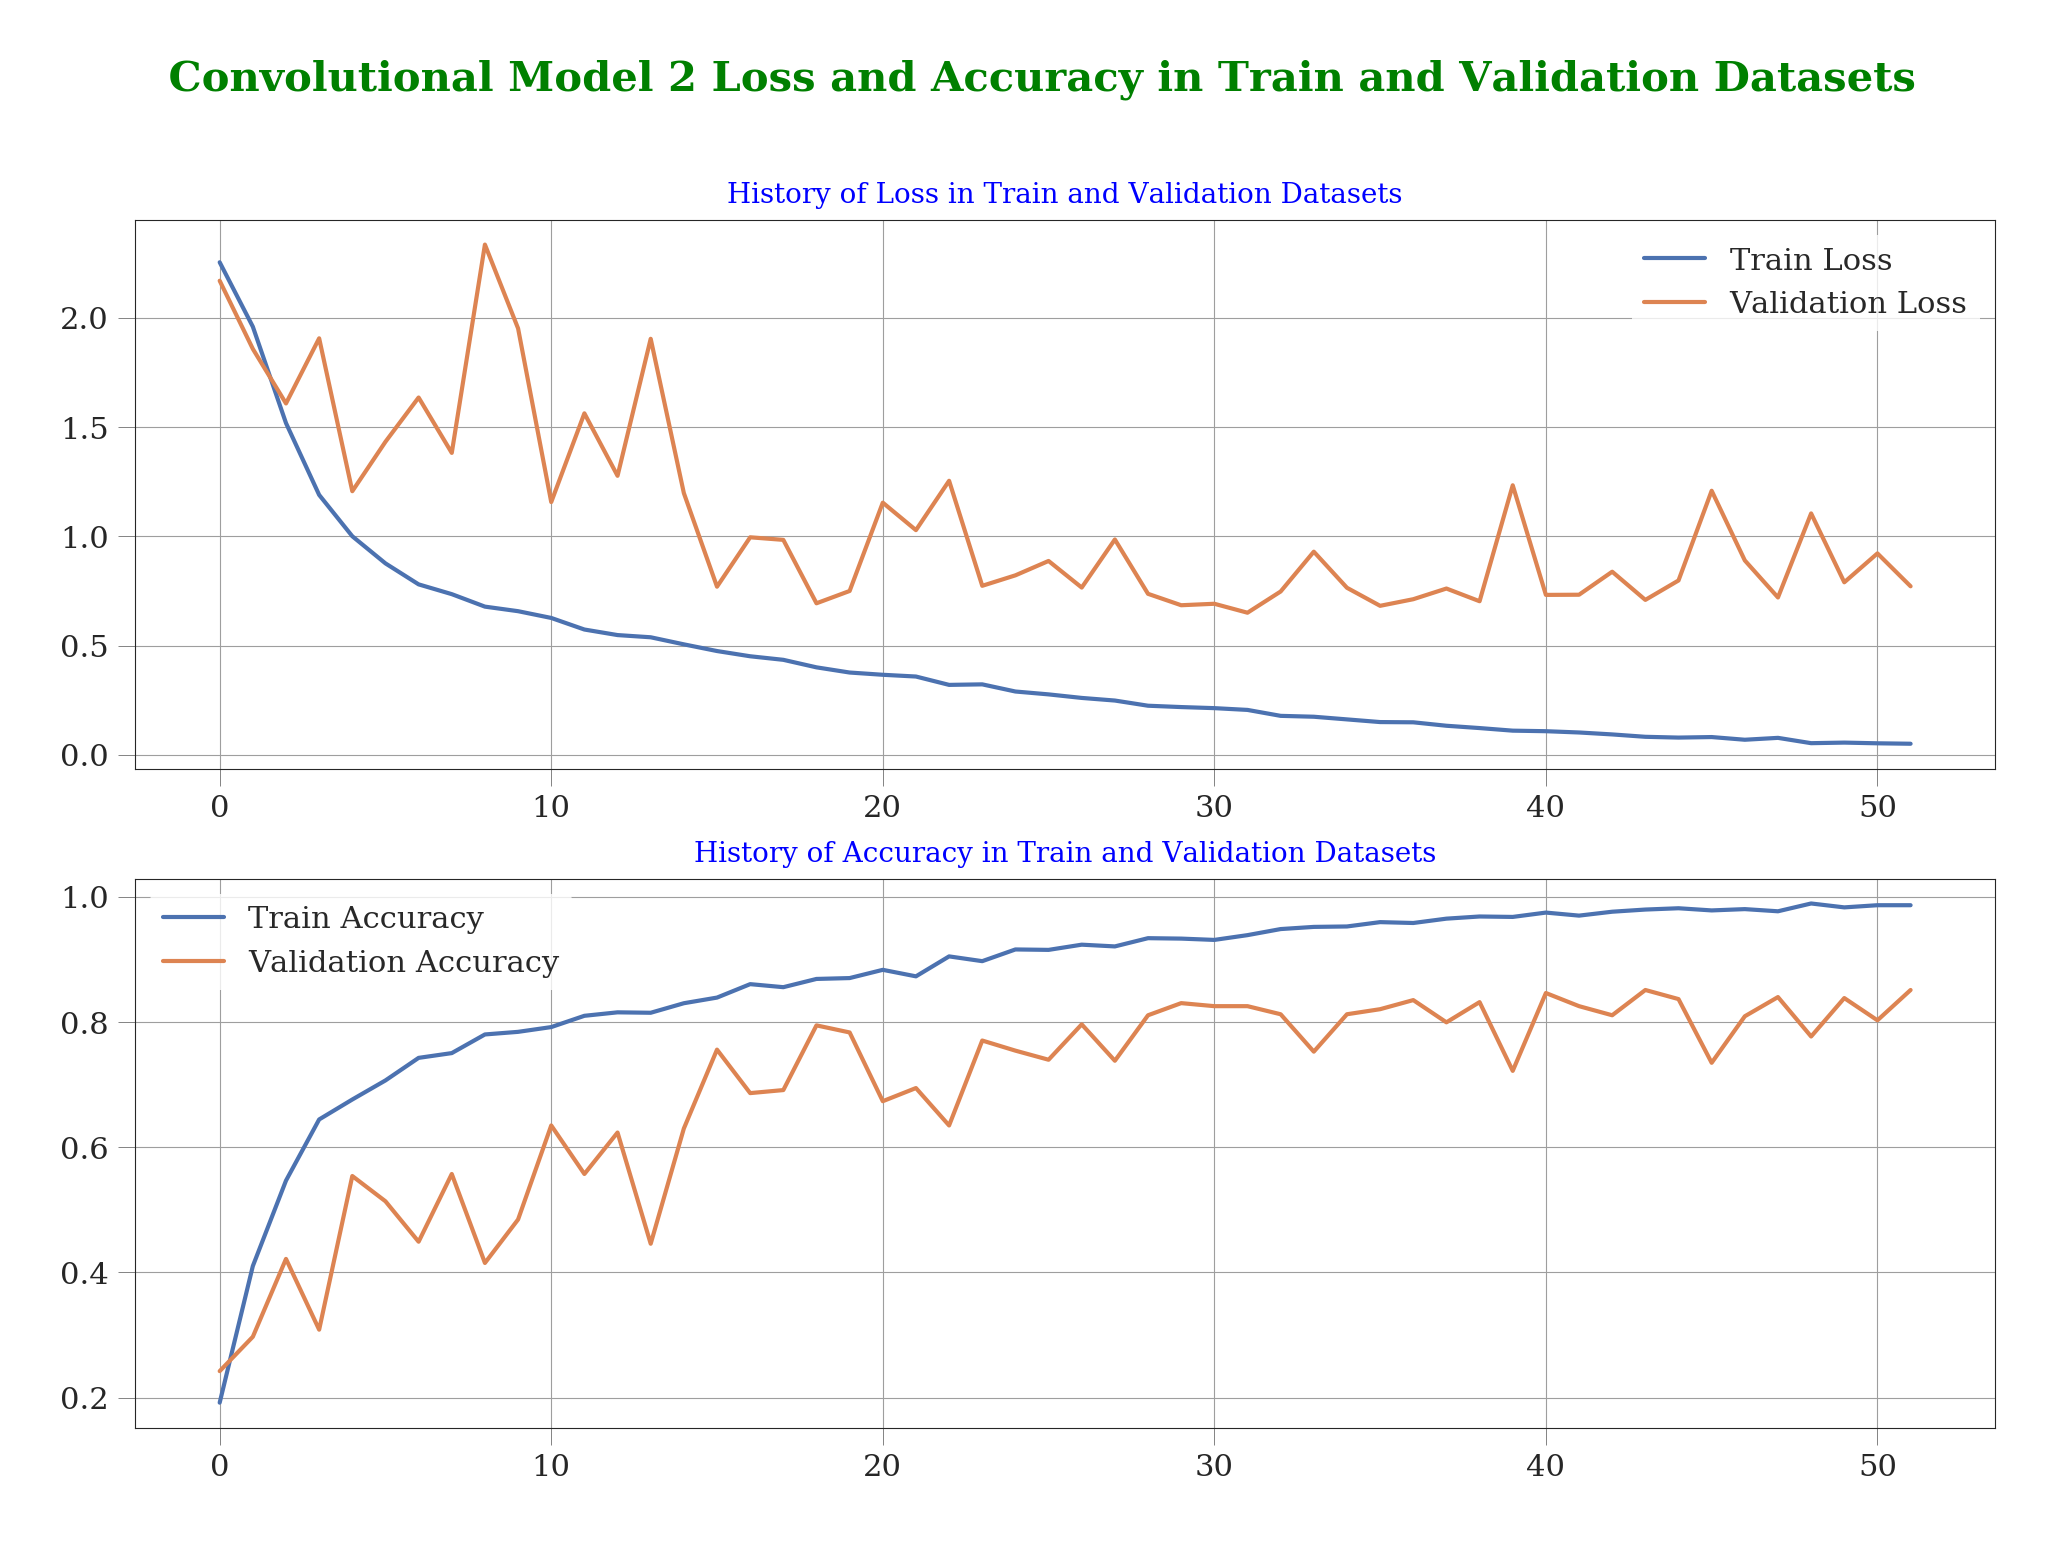

In [0]:
def build_conv_model_2():
    model = Sequential()
    model.add(layers.Convolution2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
       
    model.add(layers.Convolution2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
        
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
      
    return model

model=build_conv_model_2()
trained_model_2=evaluate_conv_model(model=model, model_name=2, X=X, y=y)

---
##### ⬆️ **Lorsque les graphiques ci-dessus sont examinés, on peut voir que le modèle a un taux de précision d'apprentissage élevé et un taux d'exactitude de validation plus faible. De plus, bien que les zigzags du graphique de validation soient réduits, ils existent toujours. On peut évaluer que la robustesse des résultats de validation est encore faible.**
##### ⬇️ ***Compte tenu des considérations ci-dessus, il est utile d'ajouter une nouvelle couche Conv ou une couche Dropout pour éviter L'Overfitting du modèle. Ajoutons d'abord un mouvelle couche Conv.***





---
>> #### La structure CNN du Modèle ️️3️⃣ : <br> ● Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Dense (relu) ==> Dense (softmax).
--- 

[INFO]:Convolutional Model 3 created...
[INFO]:Convolutional Model 3 compiled...
[INFO]:Convolutional Model 3 training....
Epoch 00058: early stopping
[INFO]:Convolutional Model 3 trained....
[INFO]:Train Accuracy:1.000
[INFO]:Validation Accuracy:0.885


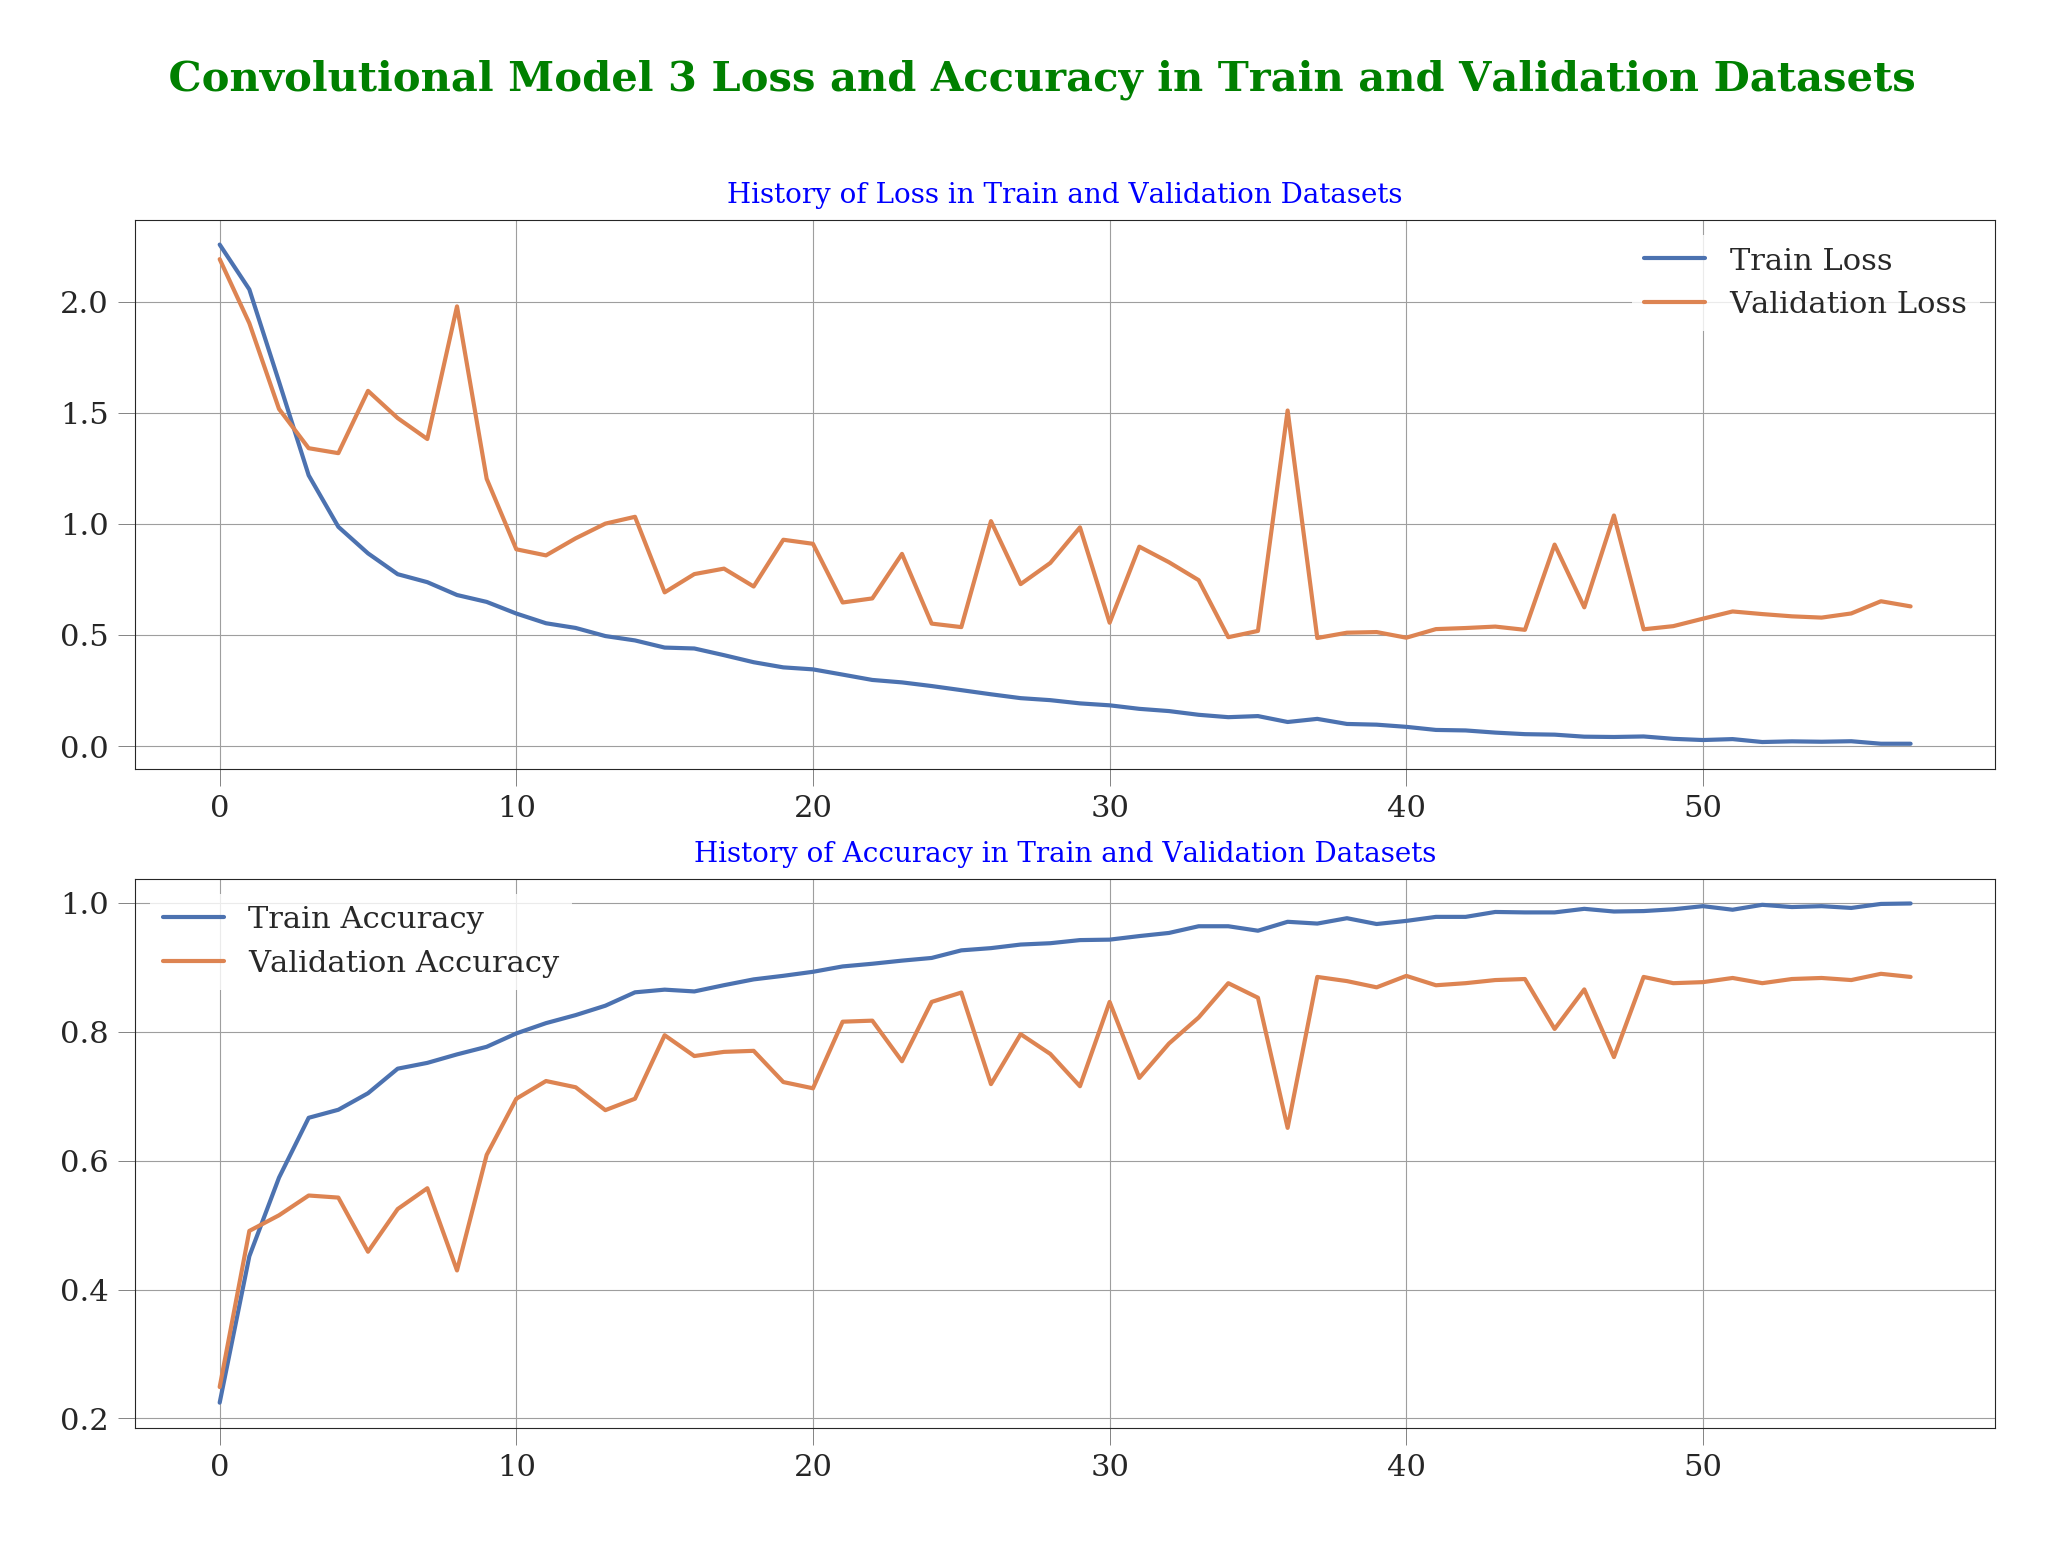

In [0]:
def build_conv_model_3():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
           
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model
    
model=build_conv_model_3()
trained_model_3=evaluate_conv_model(model=model, model_name=3, X=X, y=y)

---
##### ⬆️ **Bien que le taux de précision de validation ait augmenté, le problème de sur-ajustement du modèle existe toujours. Nous pouvons supposer que l'ajout d'une nouvelle couche Conv n'est pas utile. De plus, bien que les zigzags du graphique de validation soient réduits, ils existent toujours.**
##### ⬇️ ***Comme il y a peu d'amélioration par rapport au modèle précédent, essayons d'utiliser la couche Dropout au lieu d'ajouter une couche Conv, pour résoudre le problème d'overfitting du modèle.***




---
>> #### La structure CNN du Modèle ️️4️⃣ : <br> ● Conv ==> MaxPooling ==> Dropout ==> Conv ==> MaxPooling ==> Dropout ==> Conv ==> MaxPooling ==> Dropout ==> Dense (relu) ==> Dense (softmax).
--- 

[INFO]:Convolutional Model 4 created...
[INFO]:Convolutional Model 4 compiled...
[INFO]:Convolutional Model 4 training....
Epoch 00092: early stopping
[INFO]:Convolutional Model 4 trained....
[INFO]:Train Accuracy:1.000
[INFO]:Validation Accuracy:0.908


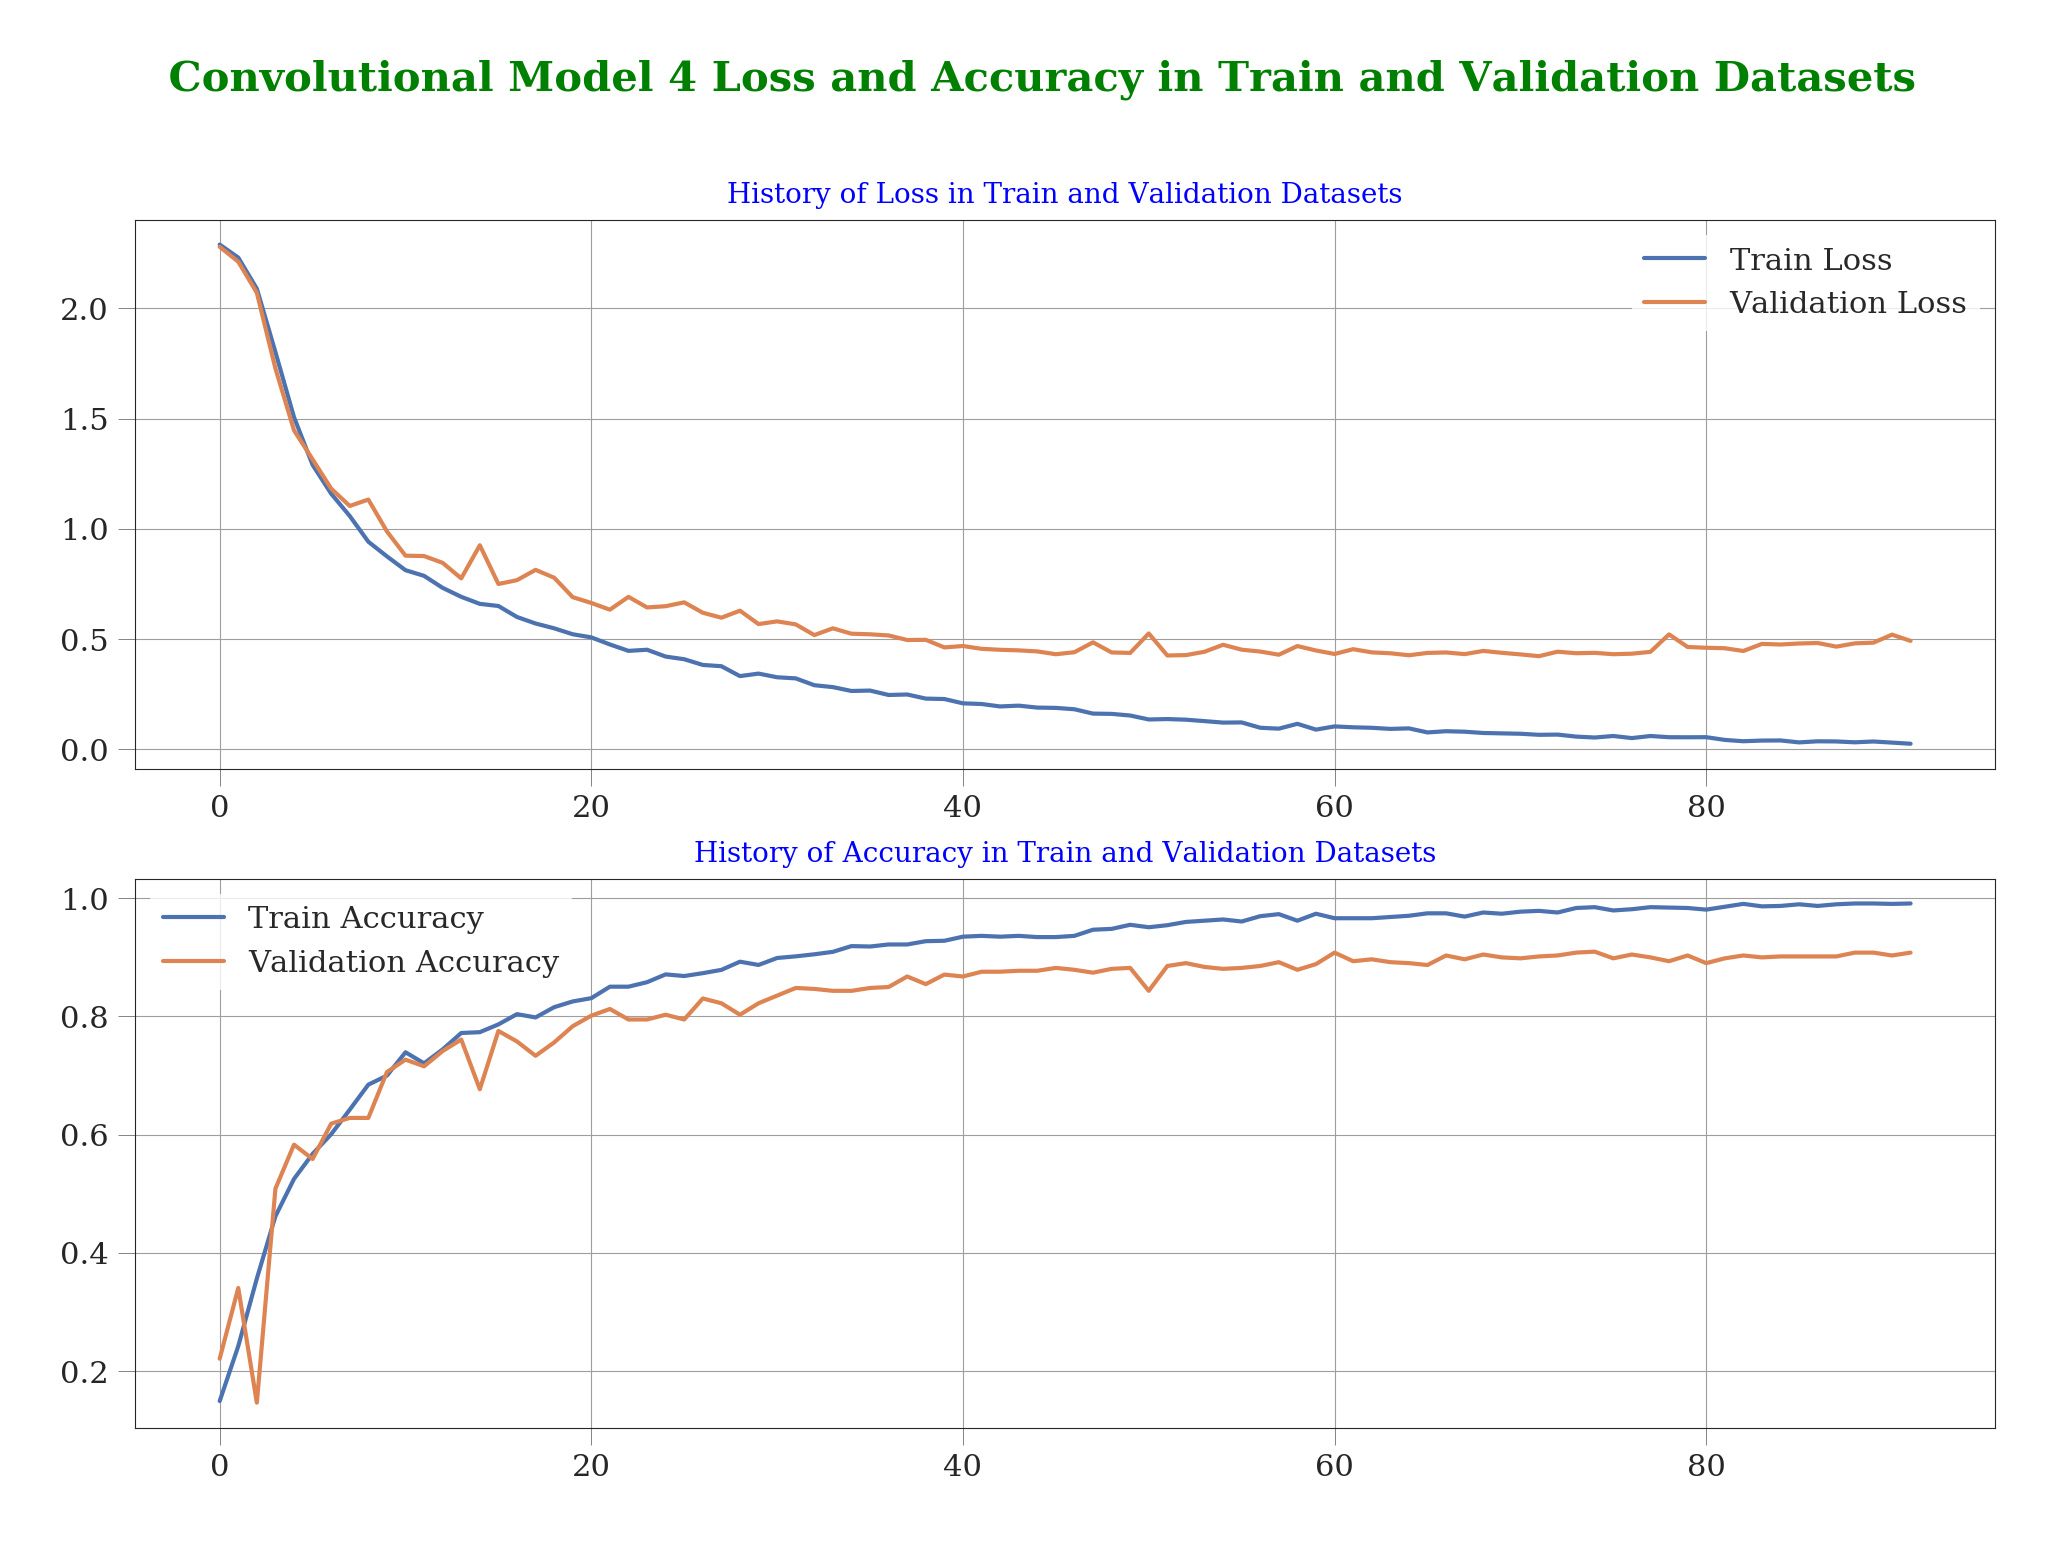

In [0]:
def build_conv_model_4():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model
    
model=build_conv_model_4()
trained_model_4=evaluate_conv_model(model=model, model_name=4, X=X, y=y)

---
##### ⬆️ **Bien que la précision de la validation ait augmenté, le problème d'Overfitting (variance élevée) du modèle existe toujours.**
##### ⬇️ ***Essayons d'ajouter une nouvelle couche Conv ==> MaxPool ==> Dropout.***




---
>> #### La structure CNN du Modèle ️️5️⃣ : <br> ● Conv ==> MaxPooling ==> Dropout ==> Conv ==> MaxPooling ==> Dropout ==> Conv ==> MaxPooling ==> Dropout ==> Conv ==> MaxPooling ==> Dropout ==> Dense ( relu) = Dense (softmax).
--- 

[INFO]:Convolutional Model 5 created...
[INFO]:Convolutional Model 5 compiled...
[INFO]:Convolutional Model 5 training....
[INFO]:Convolutional Model 5 trained....
[INFO]:Train Accuracy:0.991
[INFO]:Validation Accuracy:0.924


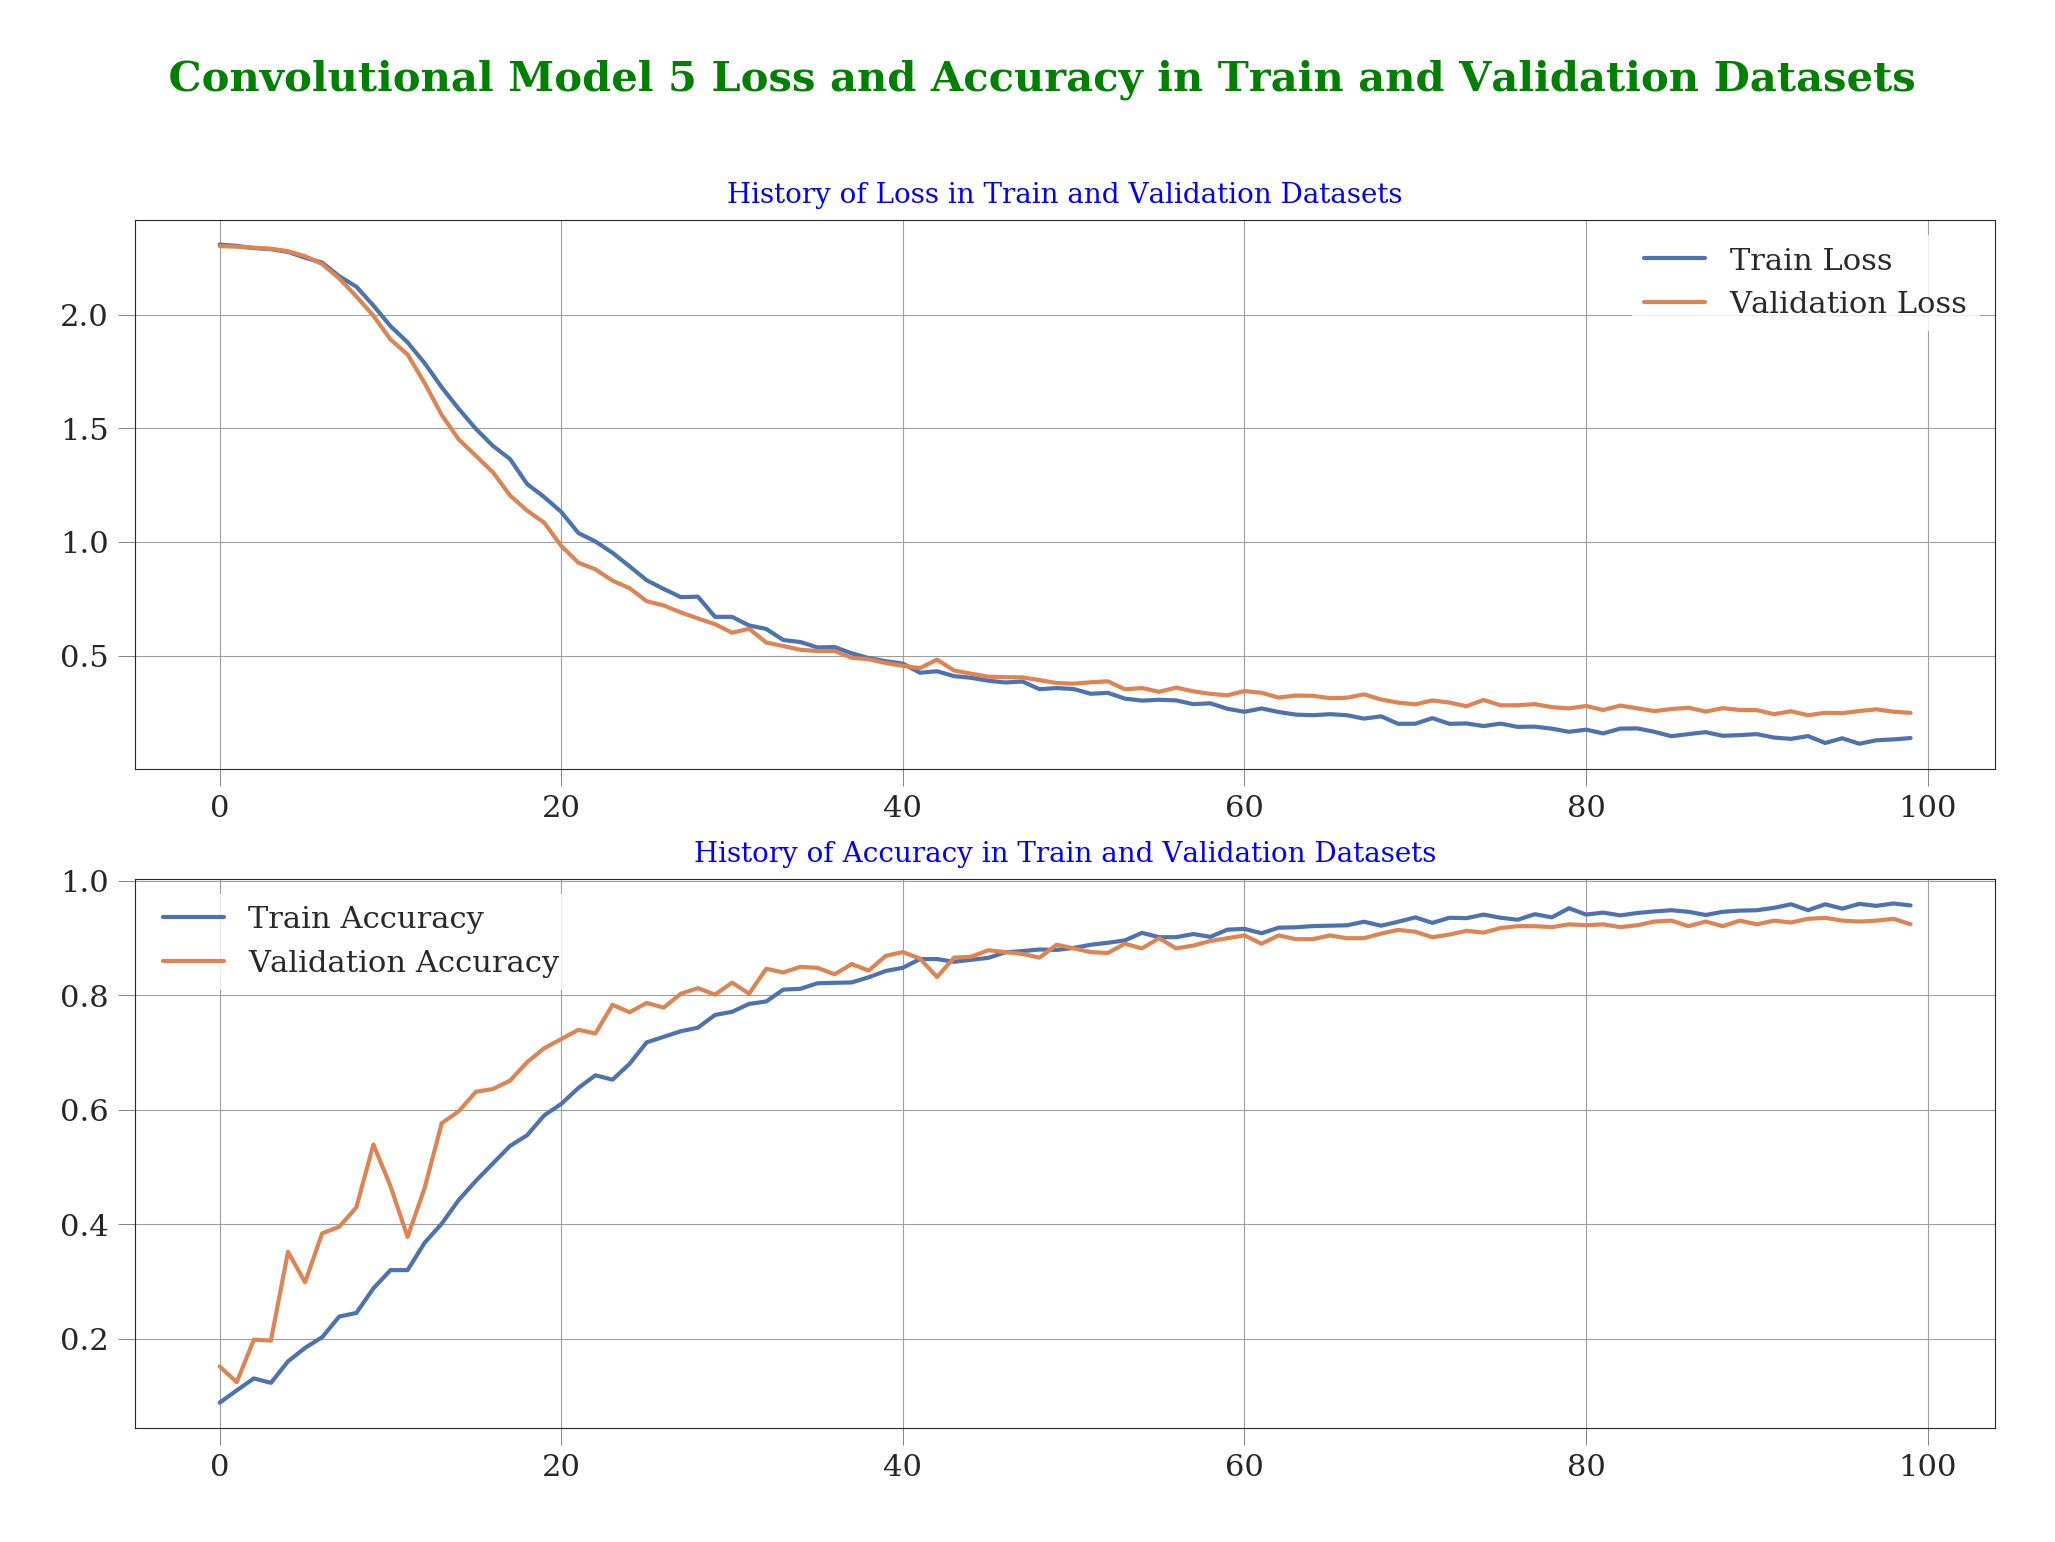

In [0]:
def build_conv_model_5():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model
    
model=build_conv_model_5()
trained_model_5=evaluate_conv_model(model=model, model_name=5, X=X, y=y)

---
##### ⬆️ **Les problèmes d'Overfitting et de la faible robustesse ont été résolus.**
##### ⬇️ ***Pour améliorer les performances du modèle, supprimons la dernière couche Dropout ajoutée au modèle 4 et utiliser la couche Dropout entre deux couches Dense.***
***
 

---
>> #### La structure CNN du Modèle ️️6️⃣ : <br> ● Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Conv ==> MaxPooling ==> Dense (relu) ==> Dropout ==> Dense (softmax).
--- 

[INFO]:Convolutional Model 6 created...
[INFO]:Convolutional Model 6 compiled...
[INFO]:Convolutional Model 6 training....
[INFO]:Convolutional Model 6 trained....
[INFO]:Train Accuracy:0.994
[INFO]:Validation Accuracy:0.947


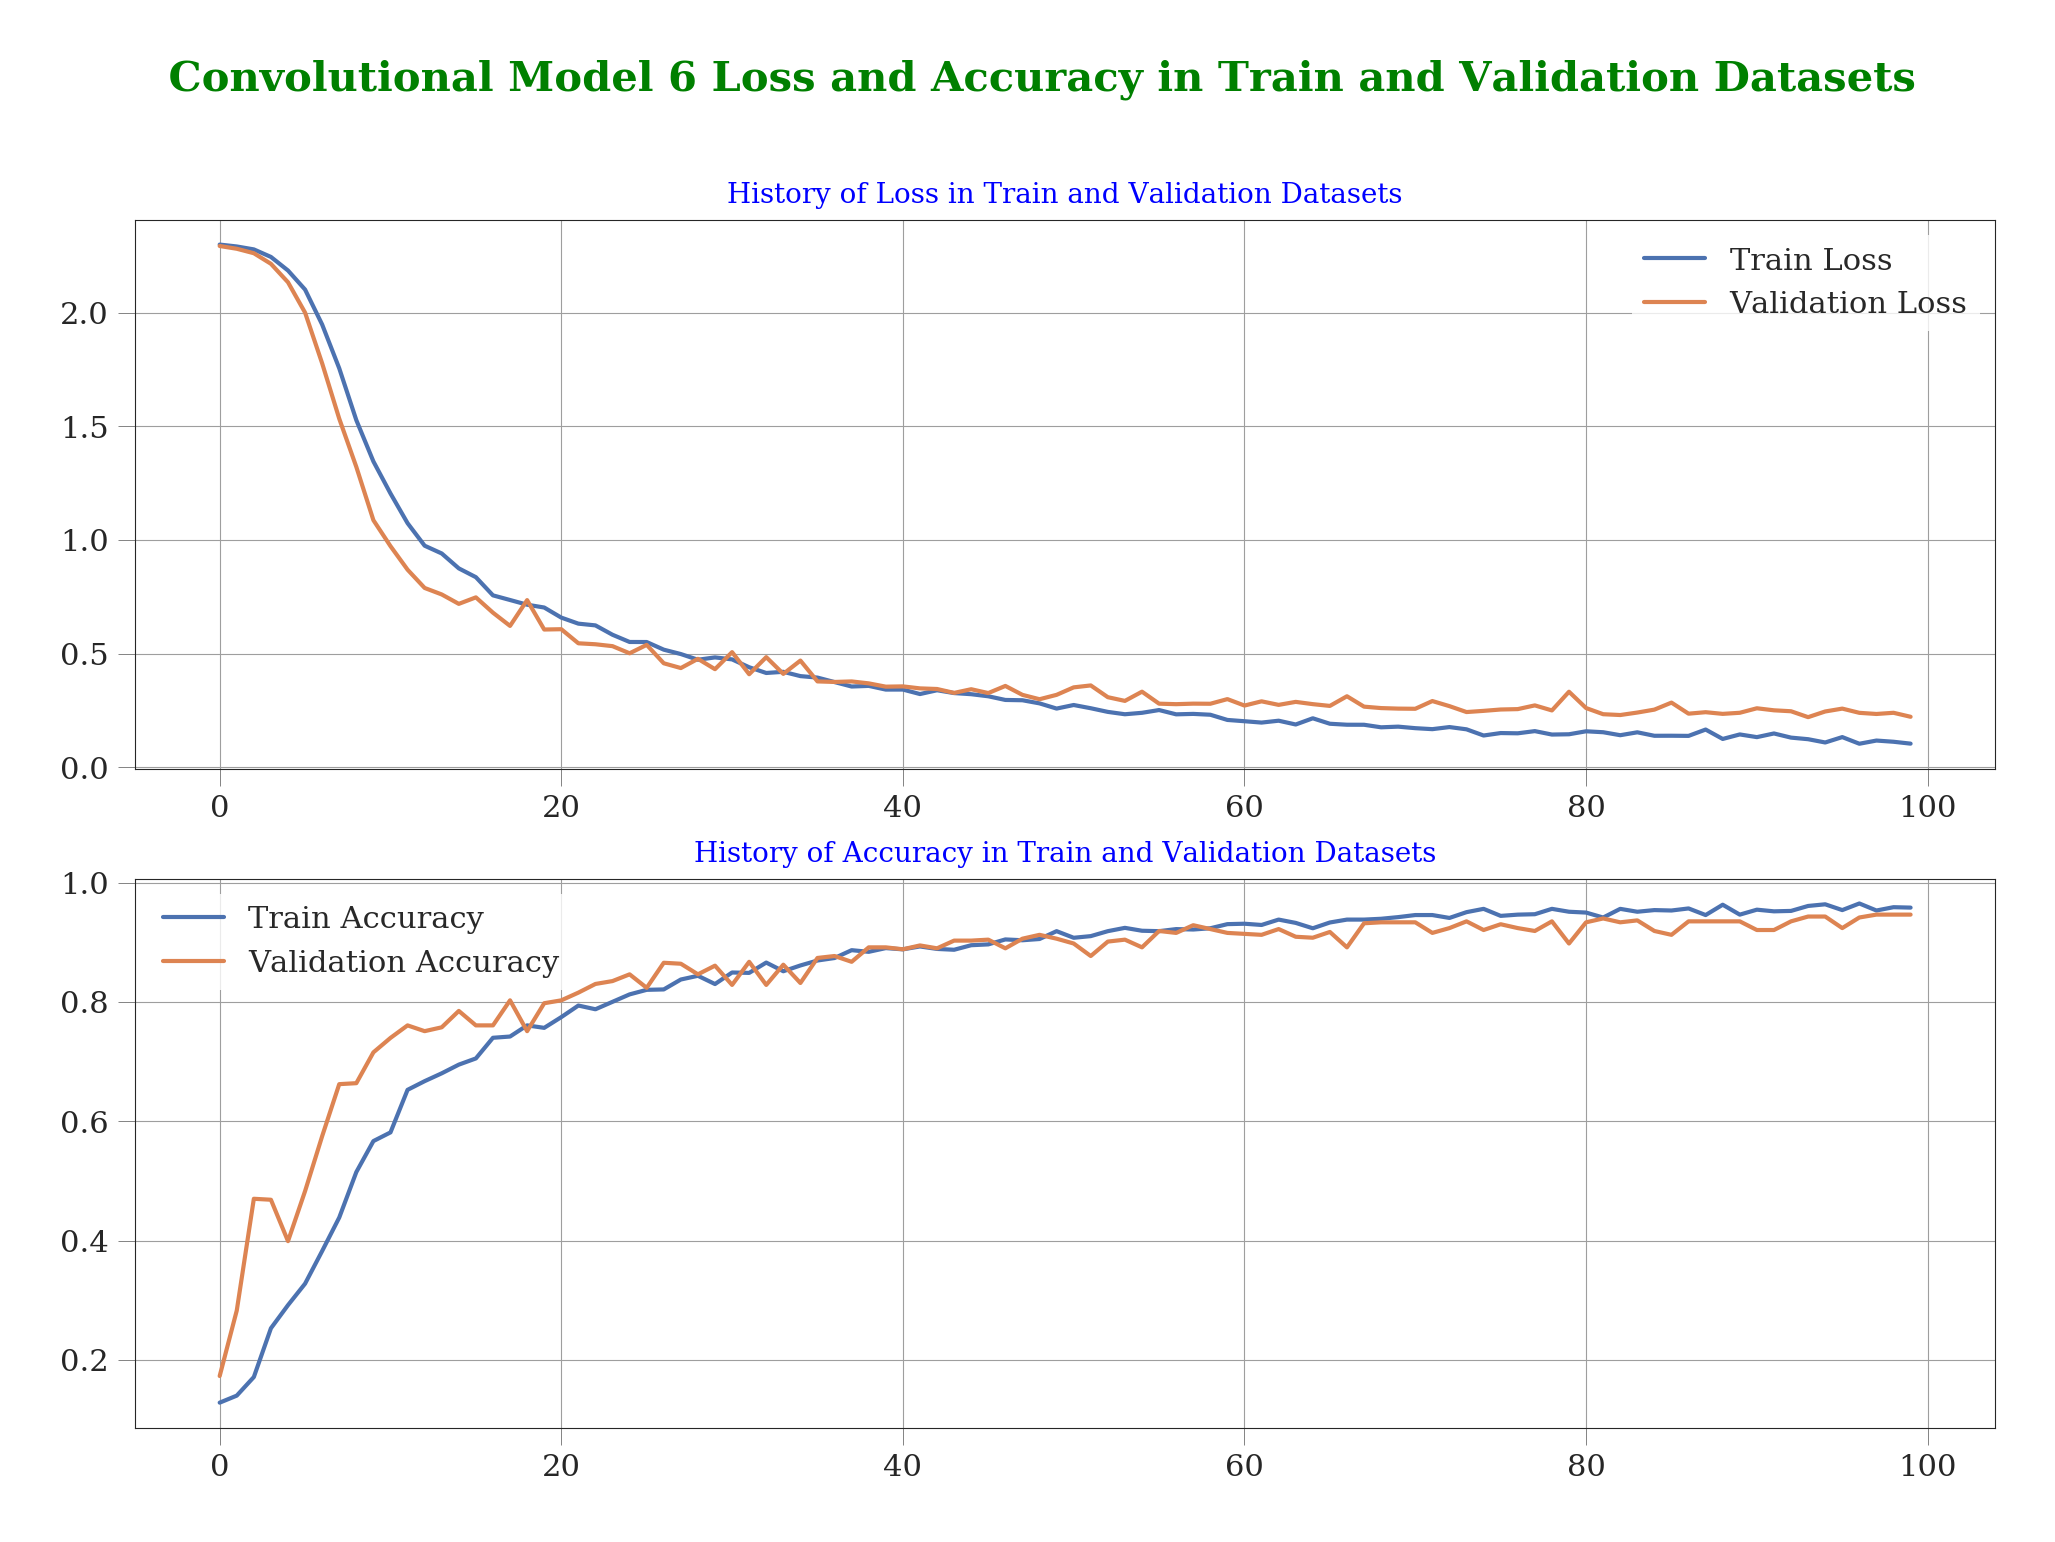

In [0]:
def build_conv_model_6():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

model=build_conv_model_6()
trained_model_6=evaluate_conv_model(model=model, model_name=6, X=X, y=y)

---
##### ⬆️ **Les problèmes d'Overfitting et de faible robustesse ont été résolus, la performances du modèle en validation a augmenté. BatchNormalization est une autre couche qui peut être utilisée dans CNN. Bien que la couche BatchNormalization prolonge le temps de formation du réseau, elle a un effet positif sur les résultats.**
##### ⬇️ ***Ajoutons la couche BatchNormalization au modèle et voyons les résultats.***
***
 

 

---
>> #### La structure CNN du Modèle ️️7️⃣ : <br> ● Conv ==> MaxPooling ==> BatchNormalization ==> Conv ==> MaxPooling ==> BatchNormalization ==> Conv ==> MaxPooling ==> BatchNormalization ==> Conv ==> MaxPooling ==> BatchNormalization ==> Dense ( relu) ==> Dropout ==> Dense (softmax).
--- 


[INFO]:Convolutional Model 7 created...
[INFO]:Convolutional Model 7 compiled...
[INFO]:Convolutional Model 7 training....
Epoch 00076: early stopping
[INFO]:Convolutional Model 7 trained....
[INFO]:Train Accuracy:1.000
[INFO]:Validation Accuracy:0.948


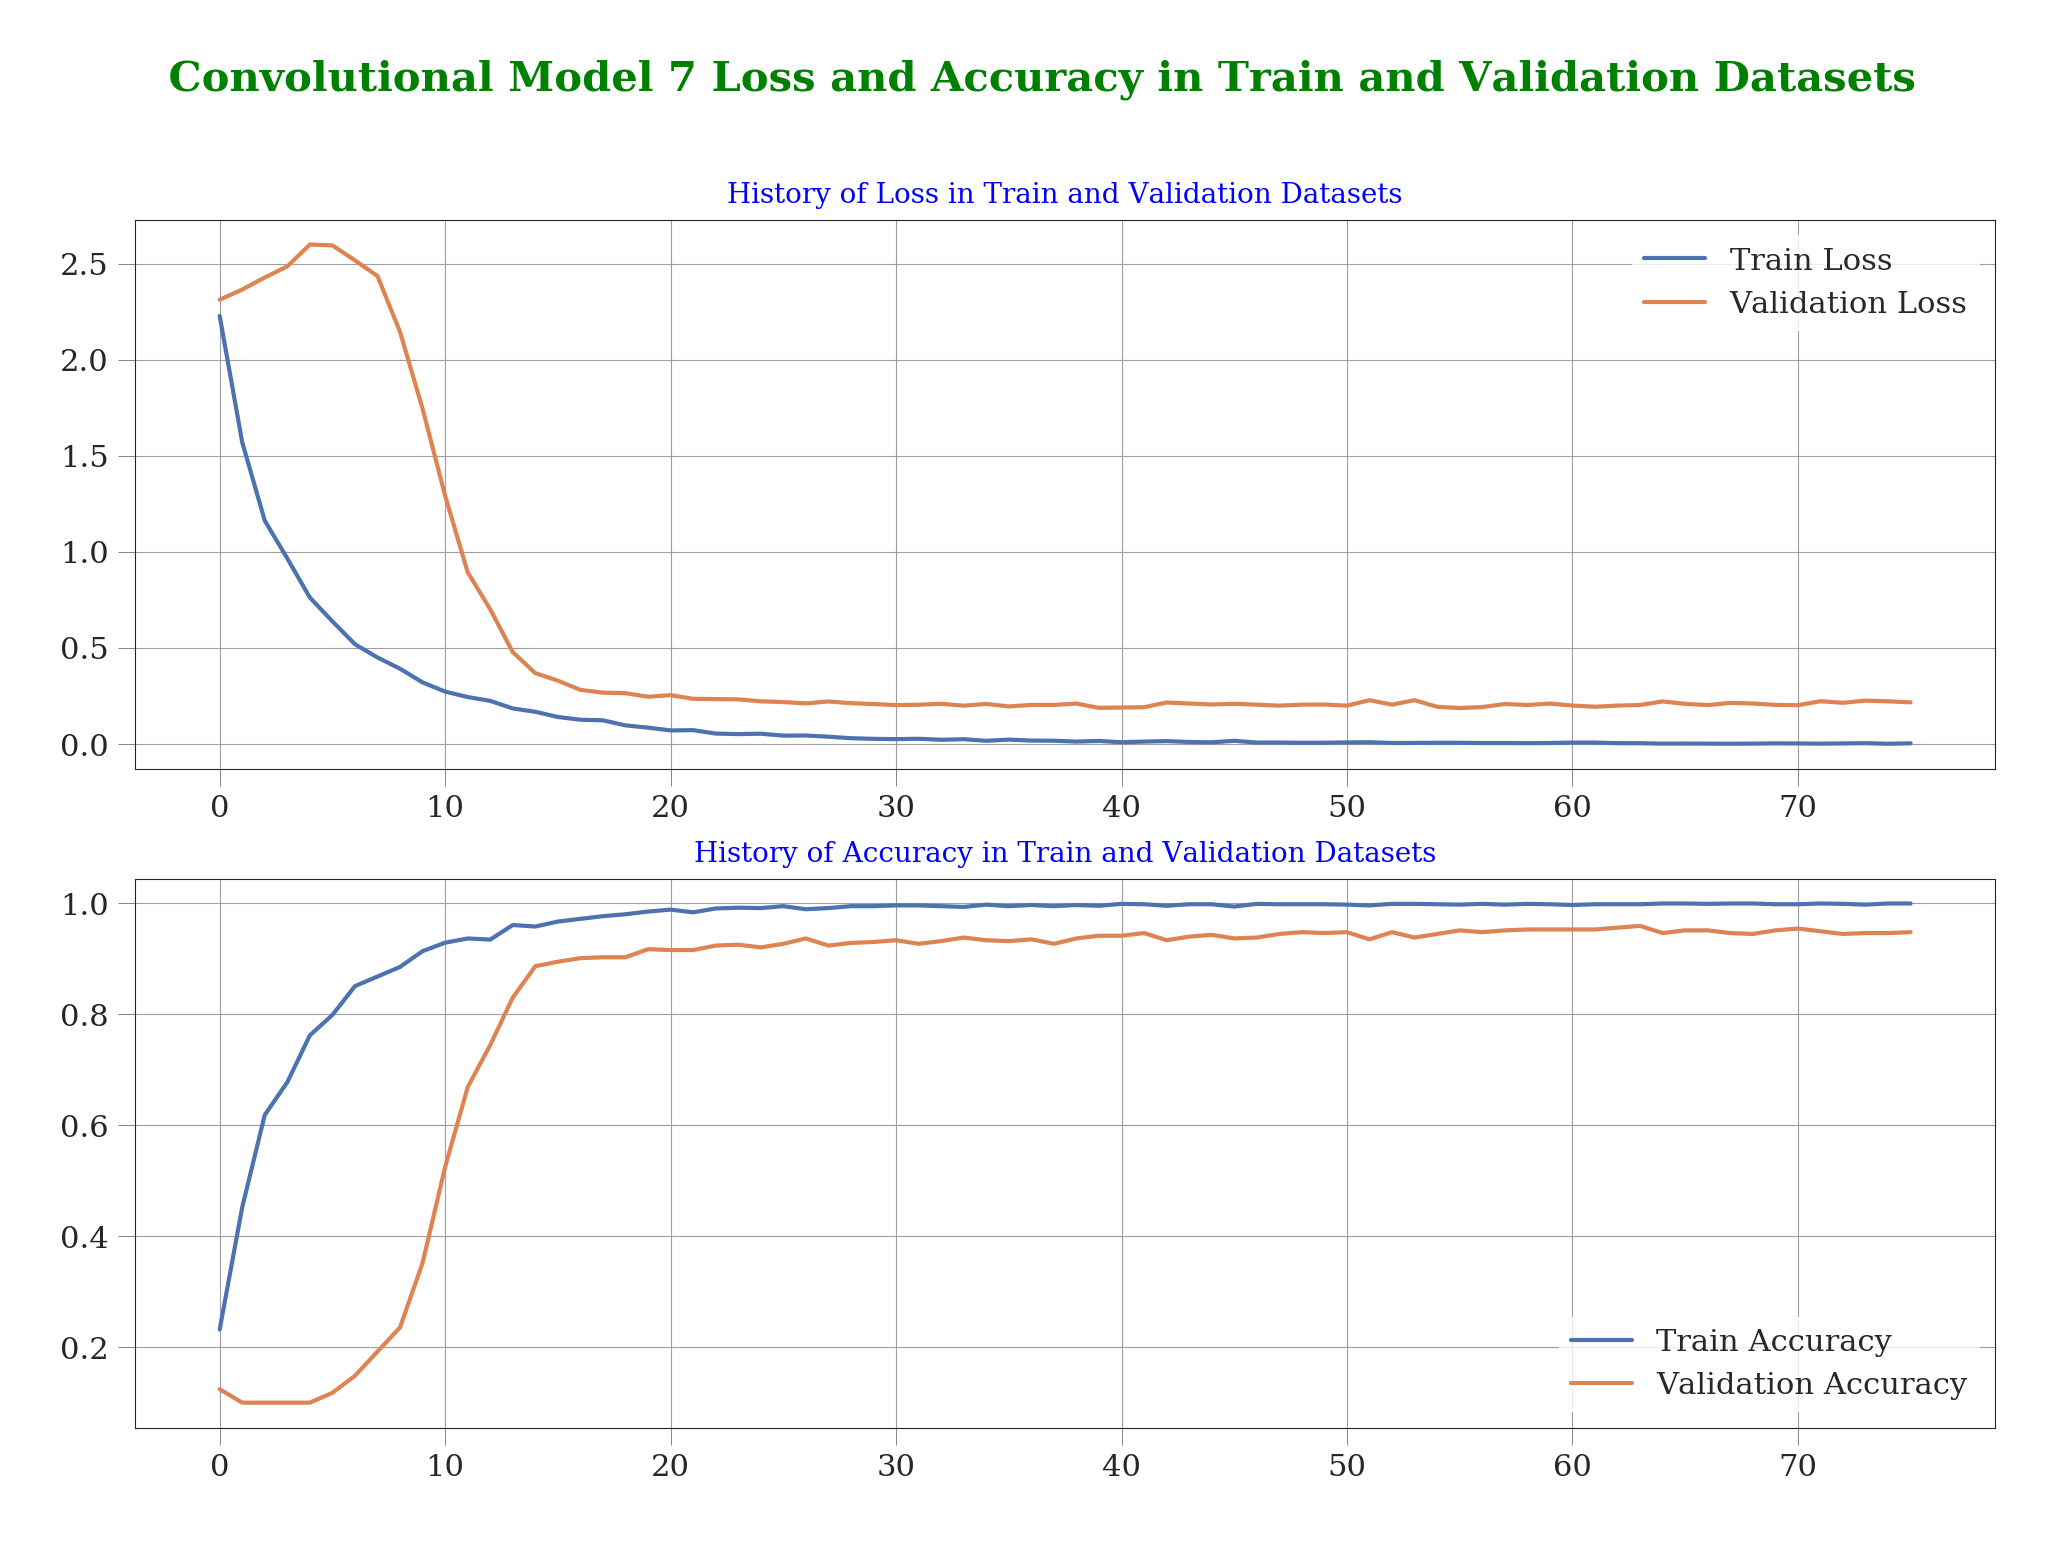

In [0]:
def build_conv_model_7():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

model=build_conv_model_7()
trained_model_7=evaluate_conv_model(model=model, model_name=7, X=X, y=y)

---
##### ⬆️ **Comme prévu,La couche BatchNormalization augmente les performances du modèle. Mais il y a un problème d'Overfitting dans le modèle.**
##### ⬇️ ***Pour y faire face, nous utiliserons la couche Dropout après les couches Conv.***
***
 

---
>> #### La structure CNN du Modèle ️️8️⃣ : <br> ● Conv ==> MaxPooling ==> BatchNormalization ==> Dropout ==> Conv ==> MaxPooling ==> BatchNormalization ==> Dropout ==> Conv ==> MaxPooling ==> BatchNormalization ==> Dropout ==> Conv = => MaxPooling ==> BatchNormalization ==> Dropout ==> Dense (relu) ==> Dropout ==> Dense (softmax).
--- 


[INFO]:Convolutional Model 8 created...
[INFO]:Convolutional Model 8 compiled...
[INFO]:Convolutional Model 8 training....
[INFO]:Convolutional Model 8 trained....
[INFO]:Train Accuracy:0.992
[INFO]:Validation Accuracy:0.939


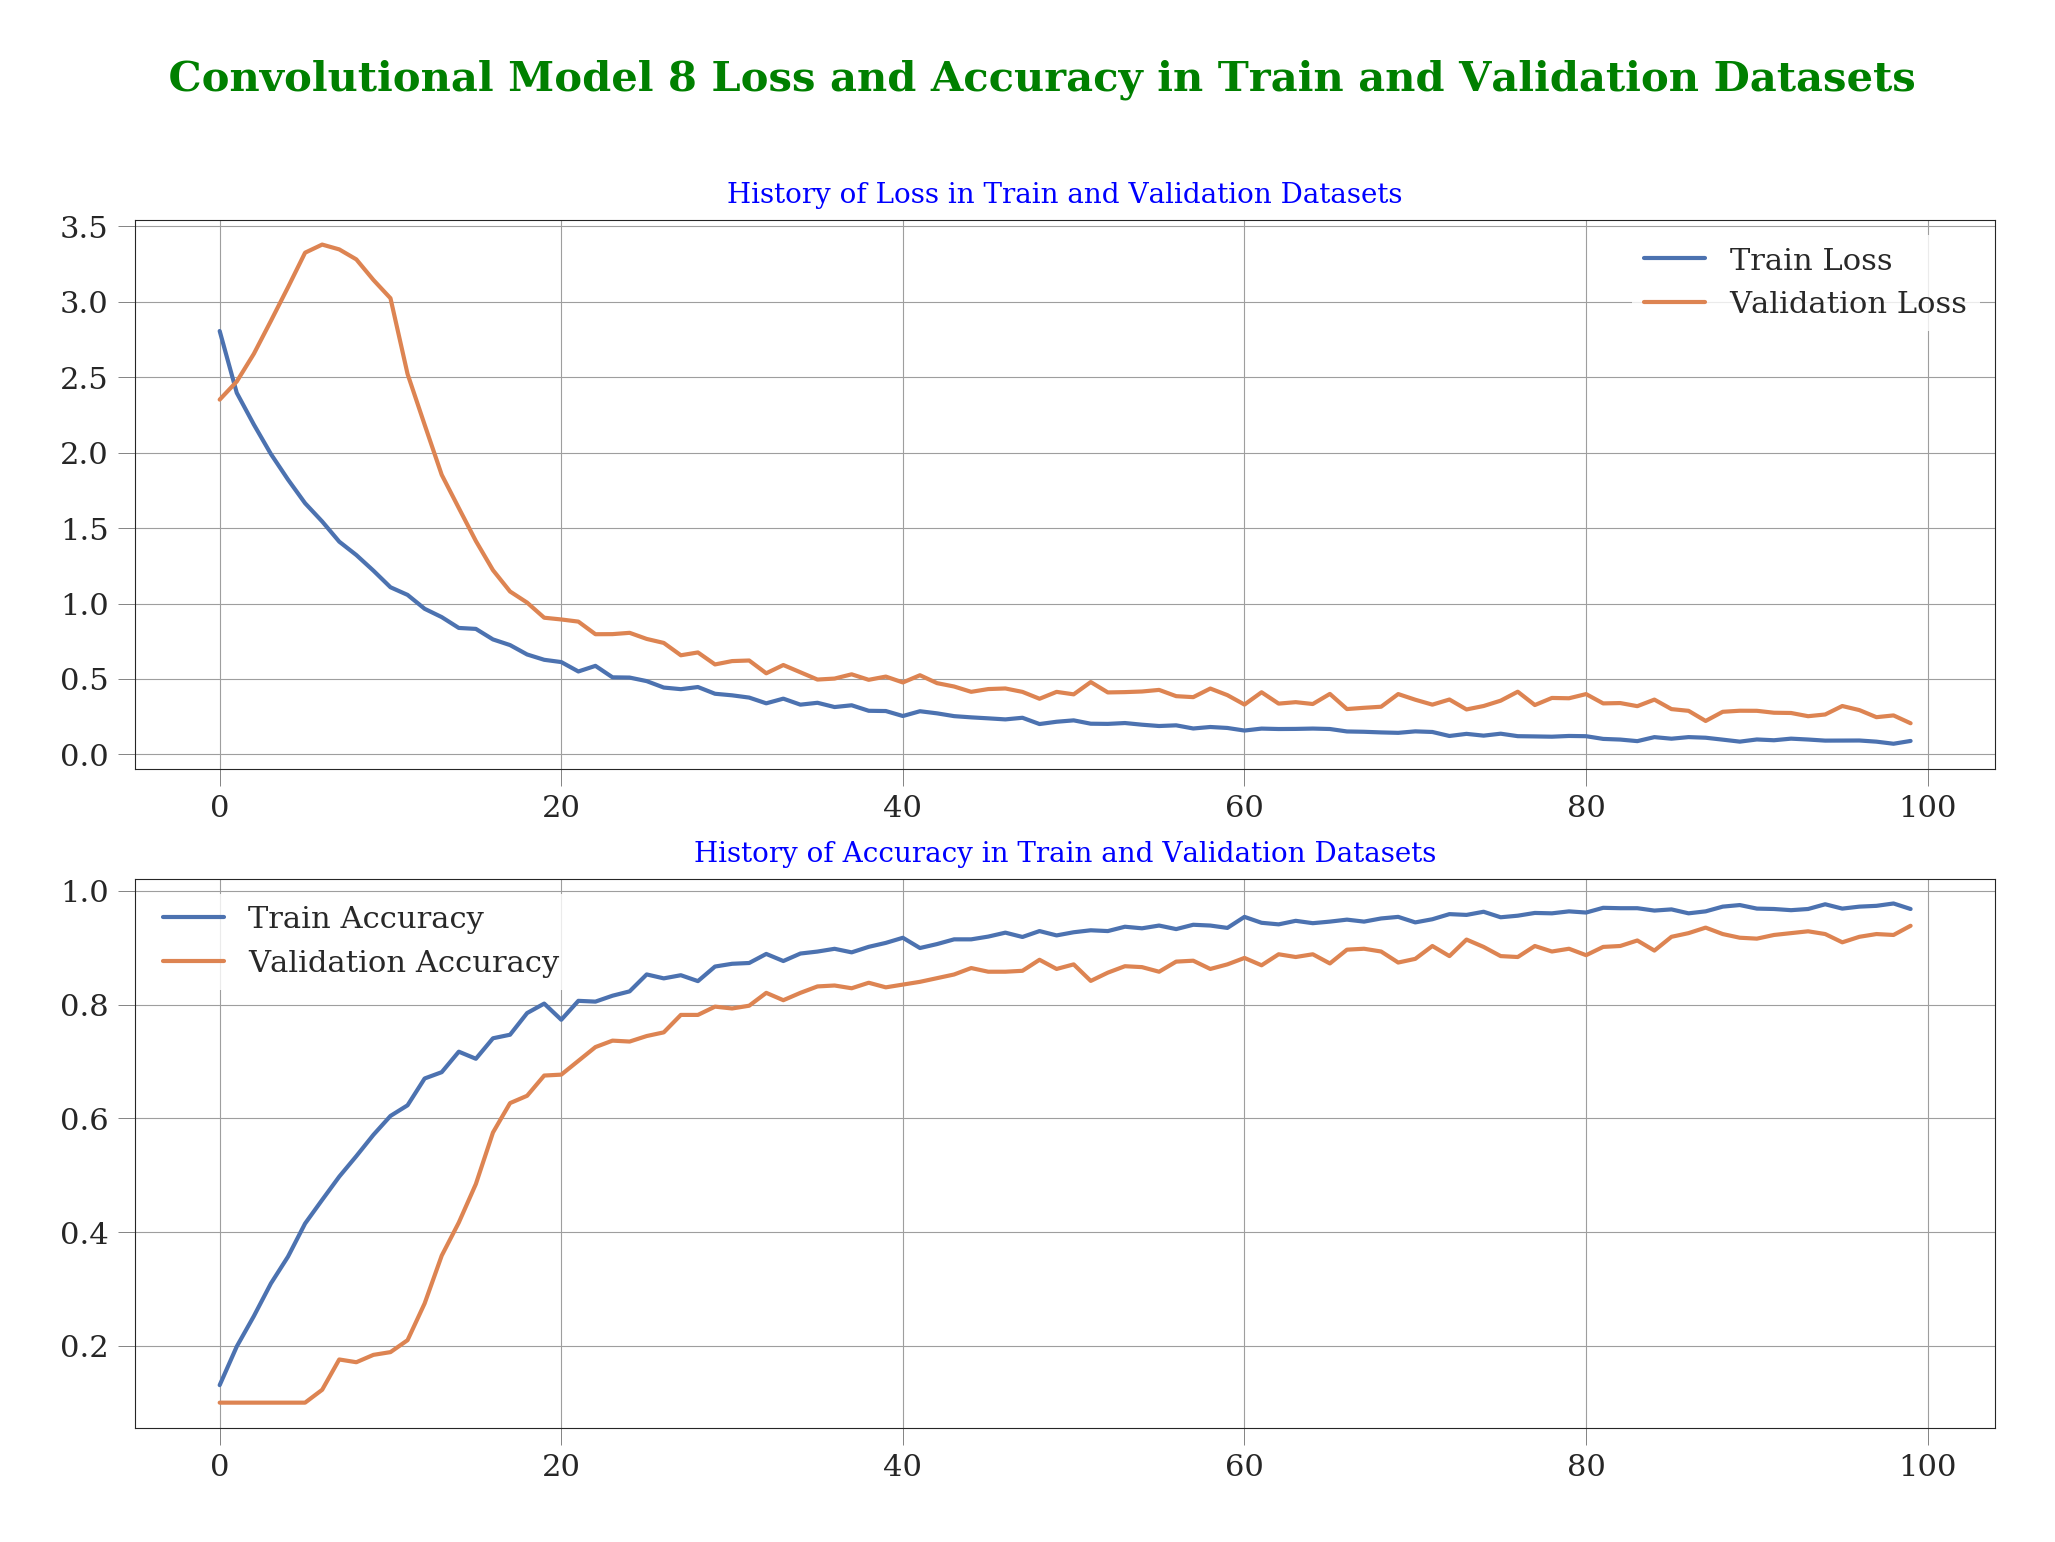

In [0]:
def build_conv_model_8():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

model=build_conv_model_8()
trained_model_8=evaluate_conv_model(model=model, model_name=8, X=X, y=y)

---
##### ⬆️ **Les performances ont été légèrement améliorées.**



---
> ### **🟧 Evaluation du modèle.**
---

> ##### **▶️ Matrice de confusion**
---

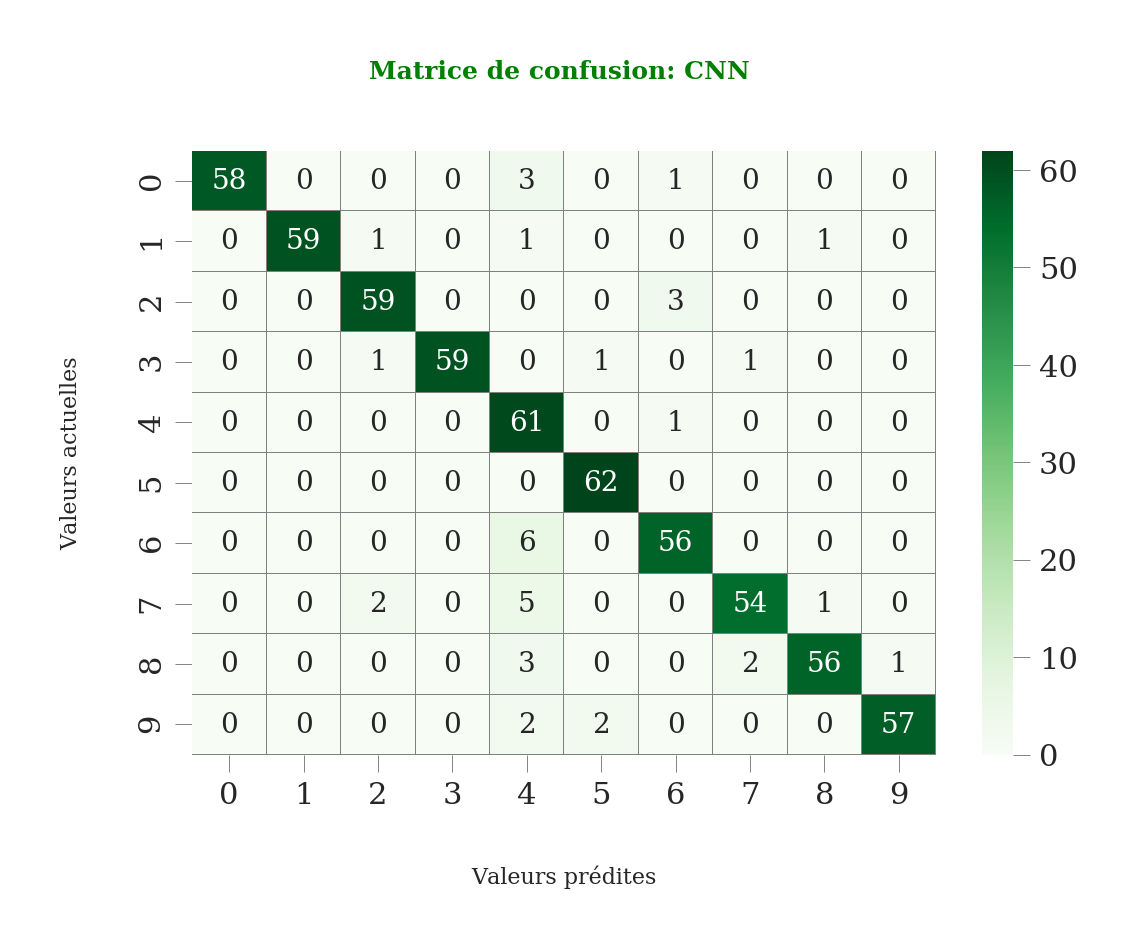

In [0]:
#Matrice de confusion
X_train, X_test, y_train, y_test = split_dataset(X, y)
# Predict the values from the validation dataset
Y_pred = trained_model_8.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = metrics.confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Valeurs prédites",size=8)
plt.ylabel("Valeurs actuelles",size=8)
plt.title('Matrice de confusion: CNN \n\n', weight='700',color='Green', size=9)
plt.show()

> ##### **▶️ Prédiction des images**
---

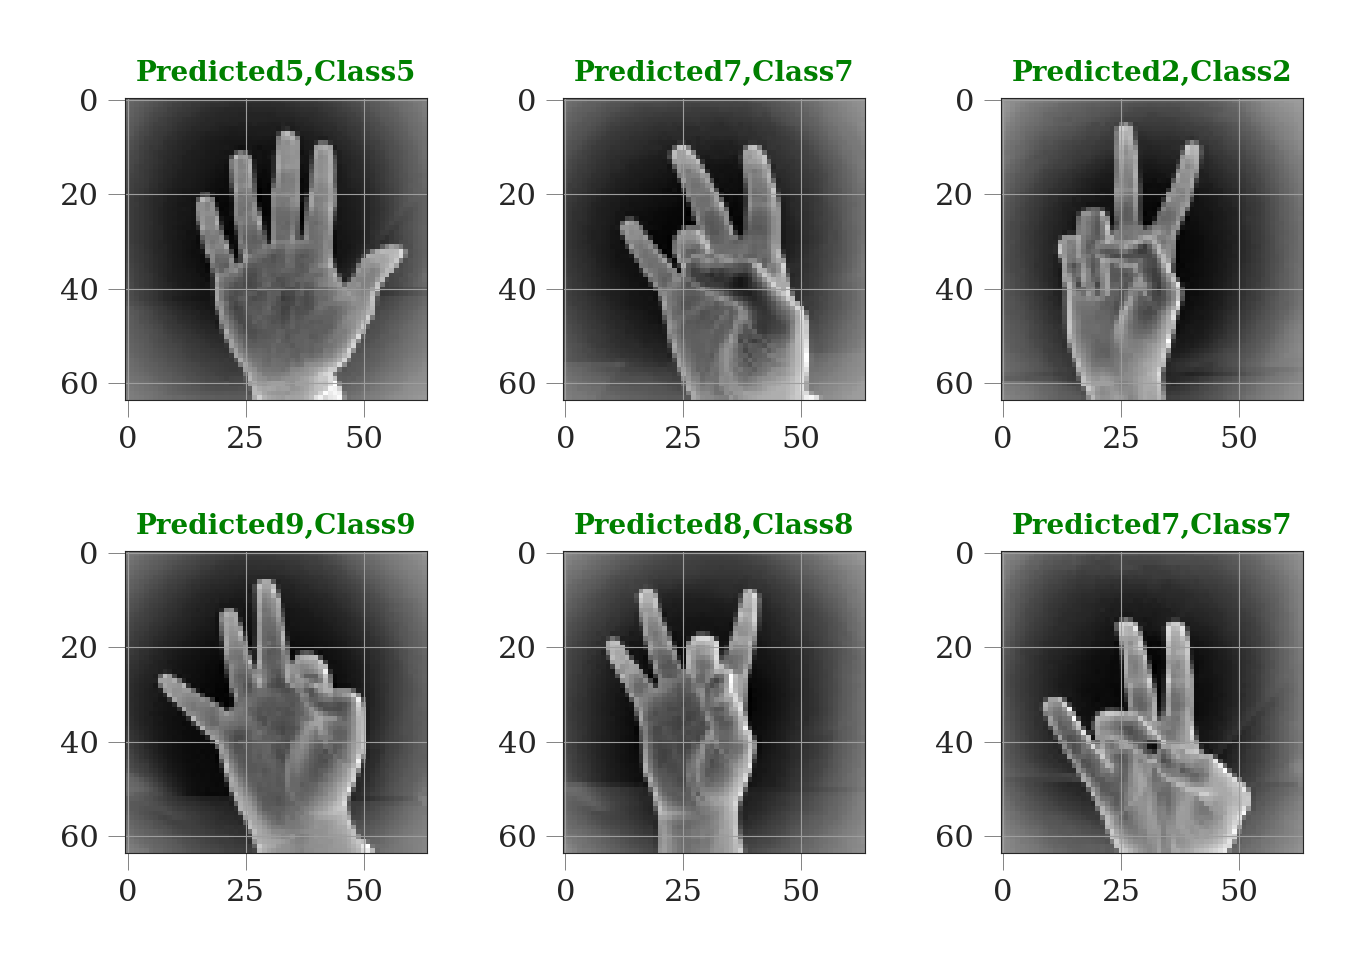

In [0]:
correct = np.where(Y_pred_classes==Y_true)[0]
for i,correct in enumerate(correct[30:36]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[correct].reshape(64,64),interpolation='None', cmap="gray")
    plt.title("Predicted{},Class{}".format(Y_pred_classes[correct],Y_true[correct]),
             weight='600',color='Green', size=10)
    plt.subplots_adjust(hspace=.5)
plt.show()

###  ✅ **Benchmarking**

In [0]:
model=build_conv_model_8()
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])
resultatfinal=model.fit(X_train, y_train, 
             validation_data=(X_test, y_test),
             epochs=100,
             verbose=0)

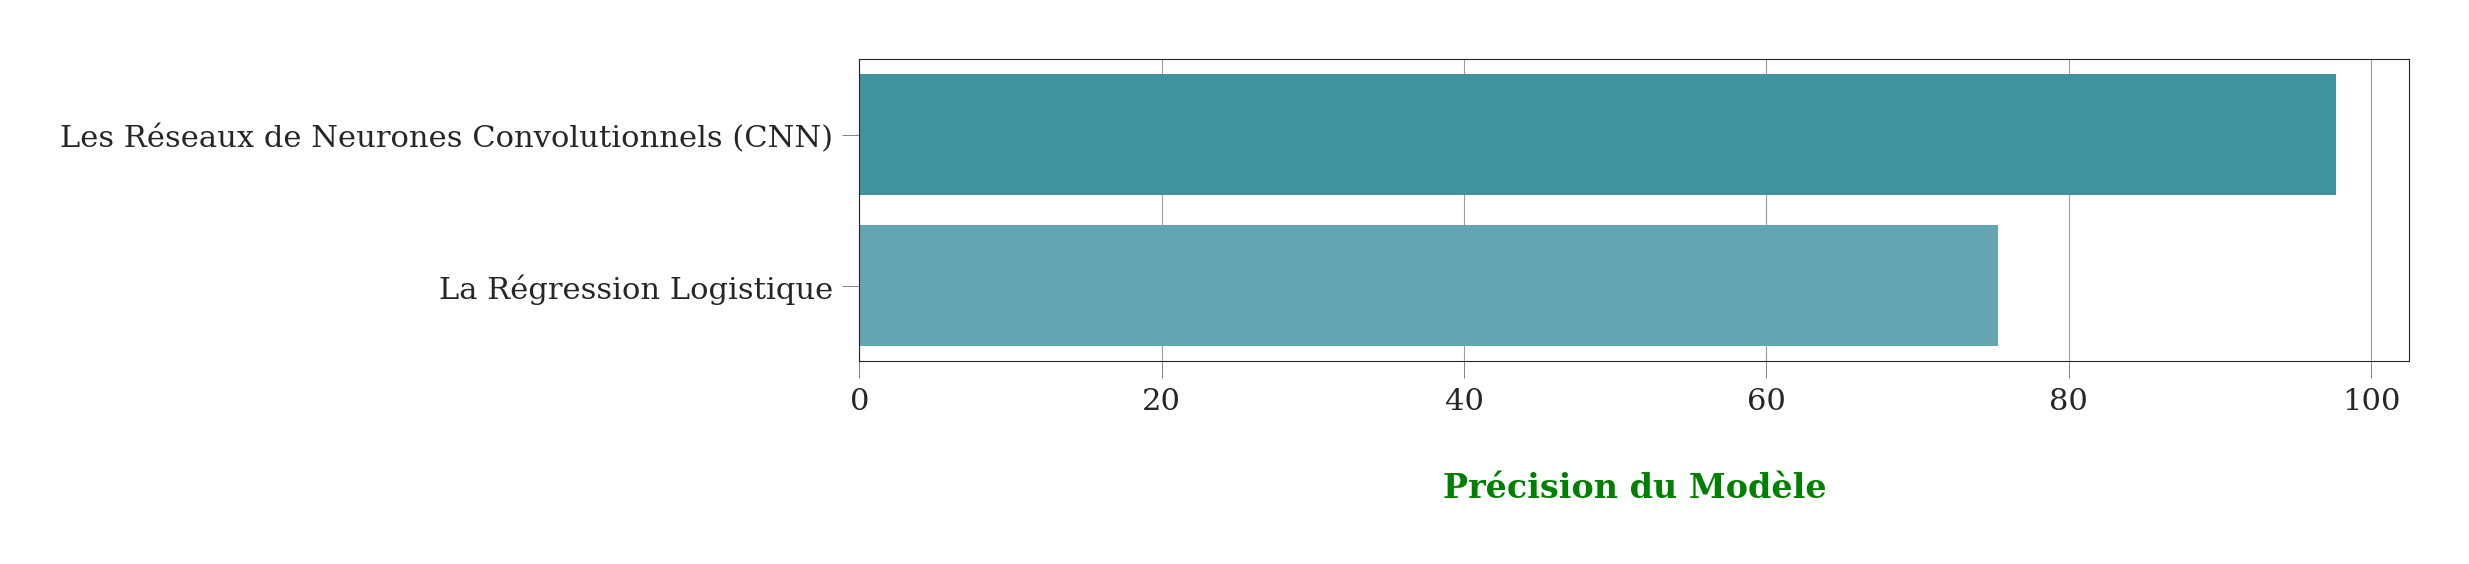

In [0]:
column = ["Les Réseaux de Neurones Convolutionnels (CNN)","La Régression Logistique"]
f,ax = plt.subplots(figsize = (10,2))
accuracy_list = []
accuracy_list.append(np.max(resultatfinal.history['accuracy'])*100)
accuracy_list.append(Precision_reg*100)
sns.barplot(x=accuracy_list,y=column,palette = sns.light_palette((210, 90, 60), input="husl",reverse=True))
plt.xlabel("Précision du Modèle",weight='700',color='Green', size=12)
plt.show()